In [3]:
# importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

## Context
Portuguese Bank Marketing Data Set obtained from University of California, Irvine (UCI) Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was collected from a direct marketing campaign conducted by Portuguese banking institution to offer term deposits. The data collection was made by phone calls to potential customer from May 2008 to November 2010. 

<b>bank client data:</b><br>
* 1 - age (numeric)<br>
* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
* 5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
* 6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
* 7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>

<b>related with the last contact of the current campaign:</b><br>
* 8 - contact: contact communication type (categorical: "cellular","telephone")<br>
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
* 10 - dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

<b>other attributes:</b><br>
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>

<b>social and economic context attributes</b><br>
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
* 20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

<b>Output variable (desired target):</b><br>
* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
bank = pd.read_csv('bank-additional-full.csv', delimiter = ';')

## Raw Exploration

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


> Based on the describe method, we can see the basic descriptive statistic of the numerical features:
* Age : The mean of customers' age is 40 years old, with the youngest is 17 years old and  the oldest is 98 years old.
* Duration : The mean of duration of the last call is 258 seconds. The minimum duration is 0, which means that the call did not happen, while the maximum call duration is almost 5000 seconds (over one hour long)
* Campaign : The mean of number of contacts performed during this campaign is 2.5, with the minimum of 1 and maximum of 56. This also included the last contact performed.
* pdays : The mean of passed days since the last contact of customers from previous campaign is over 900. But it should be noted that 999 is the code of customers was not previously contacted, thus this column should be observed in detail
* previous : The mean number of contact performed before this campaign is 0.17, with the minimum is 0 and the maximum is 7
> ----------
* emp.var.rate : Employment Variation Rate, the mean of it is 0.08 and the distribution ranging from -3.4 until 1.4 (it is a quarterly indicator). 
* cons.price.idx : Consumer Price Index, the value of it ranging quite narrow and the standard deviation is also quite small. The minimum value is 92.2 while the maximum value is 94.76 (it is monthly indicator -- thus later we should see the connection to the column 'month')
* cons.conf.idx : Consumer Confidence Index, all values seem to be in a negative state, with the mean of -40 and the minimum value is -50.8 and the maximum value is -26.9. (it is monthly indicator -- thus later we should see the connection to the column 'month')
* euribor3m : Euribor 3 Month Rate, the mean value is 3.6 and the minimum value is 0.6 while the maximum value is 5 (it is a daily indicator).
* nr.employed : Number of Employees, the mean value is 5167 and the mean value is 4963 and the maximum value is 5228 (it is a quarterly indicator). 

In [7]:
bank.describe(exclude = 'number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


> Now let's see the categorical columns:
There are several columns that have more than 3 unique values -- these are the feature that we need to look into deeply. To see whether we can try to group the values so we can also reduce the dimension later. Those columns are: 'job', 'marital', 'education'. For column 'month' and 'day_of_week', we can not really do anything (probably group the month into season).

In [8]:
listItem = []

for col in bank.columns:
    listItem.append([col, bank[col].dtype, bank[col].isna().sum(), round((bank[col].isna().sum())/len(bank[col])), 
                    bank[col].nunique(), list(bank[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[67, 53]"
1,job,object,0,0.0,12,"[admin., retired]"
2,marital,object,0,0.0,4,"[divorced, unknown]"
3,education,object,0,0.0,8,"[basic.6y, illiterate]"
4,default,object,0,0.0,3,"[unknown, no]"
5,housing,object,0,0.0,3,"[yes, unknown]"
6,loan,object,0,0.0,3,"[unknown, no]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[oct, sep]"
9,day_of_week,object,0,0.0,5,"[thu, mon]"


> Based on the table above, we do not have any null value. However, there are some of the columns which have 'unknown' values. 

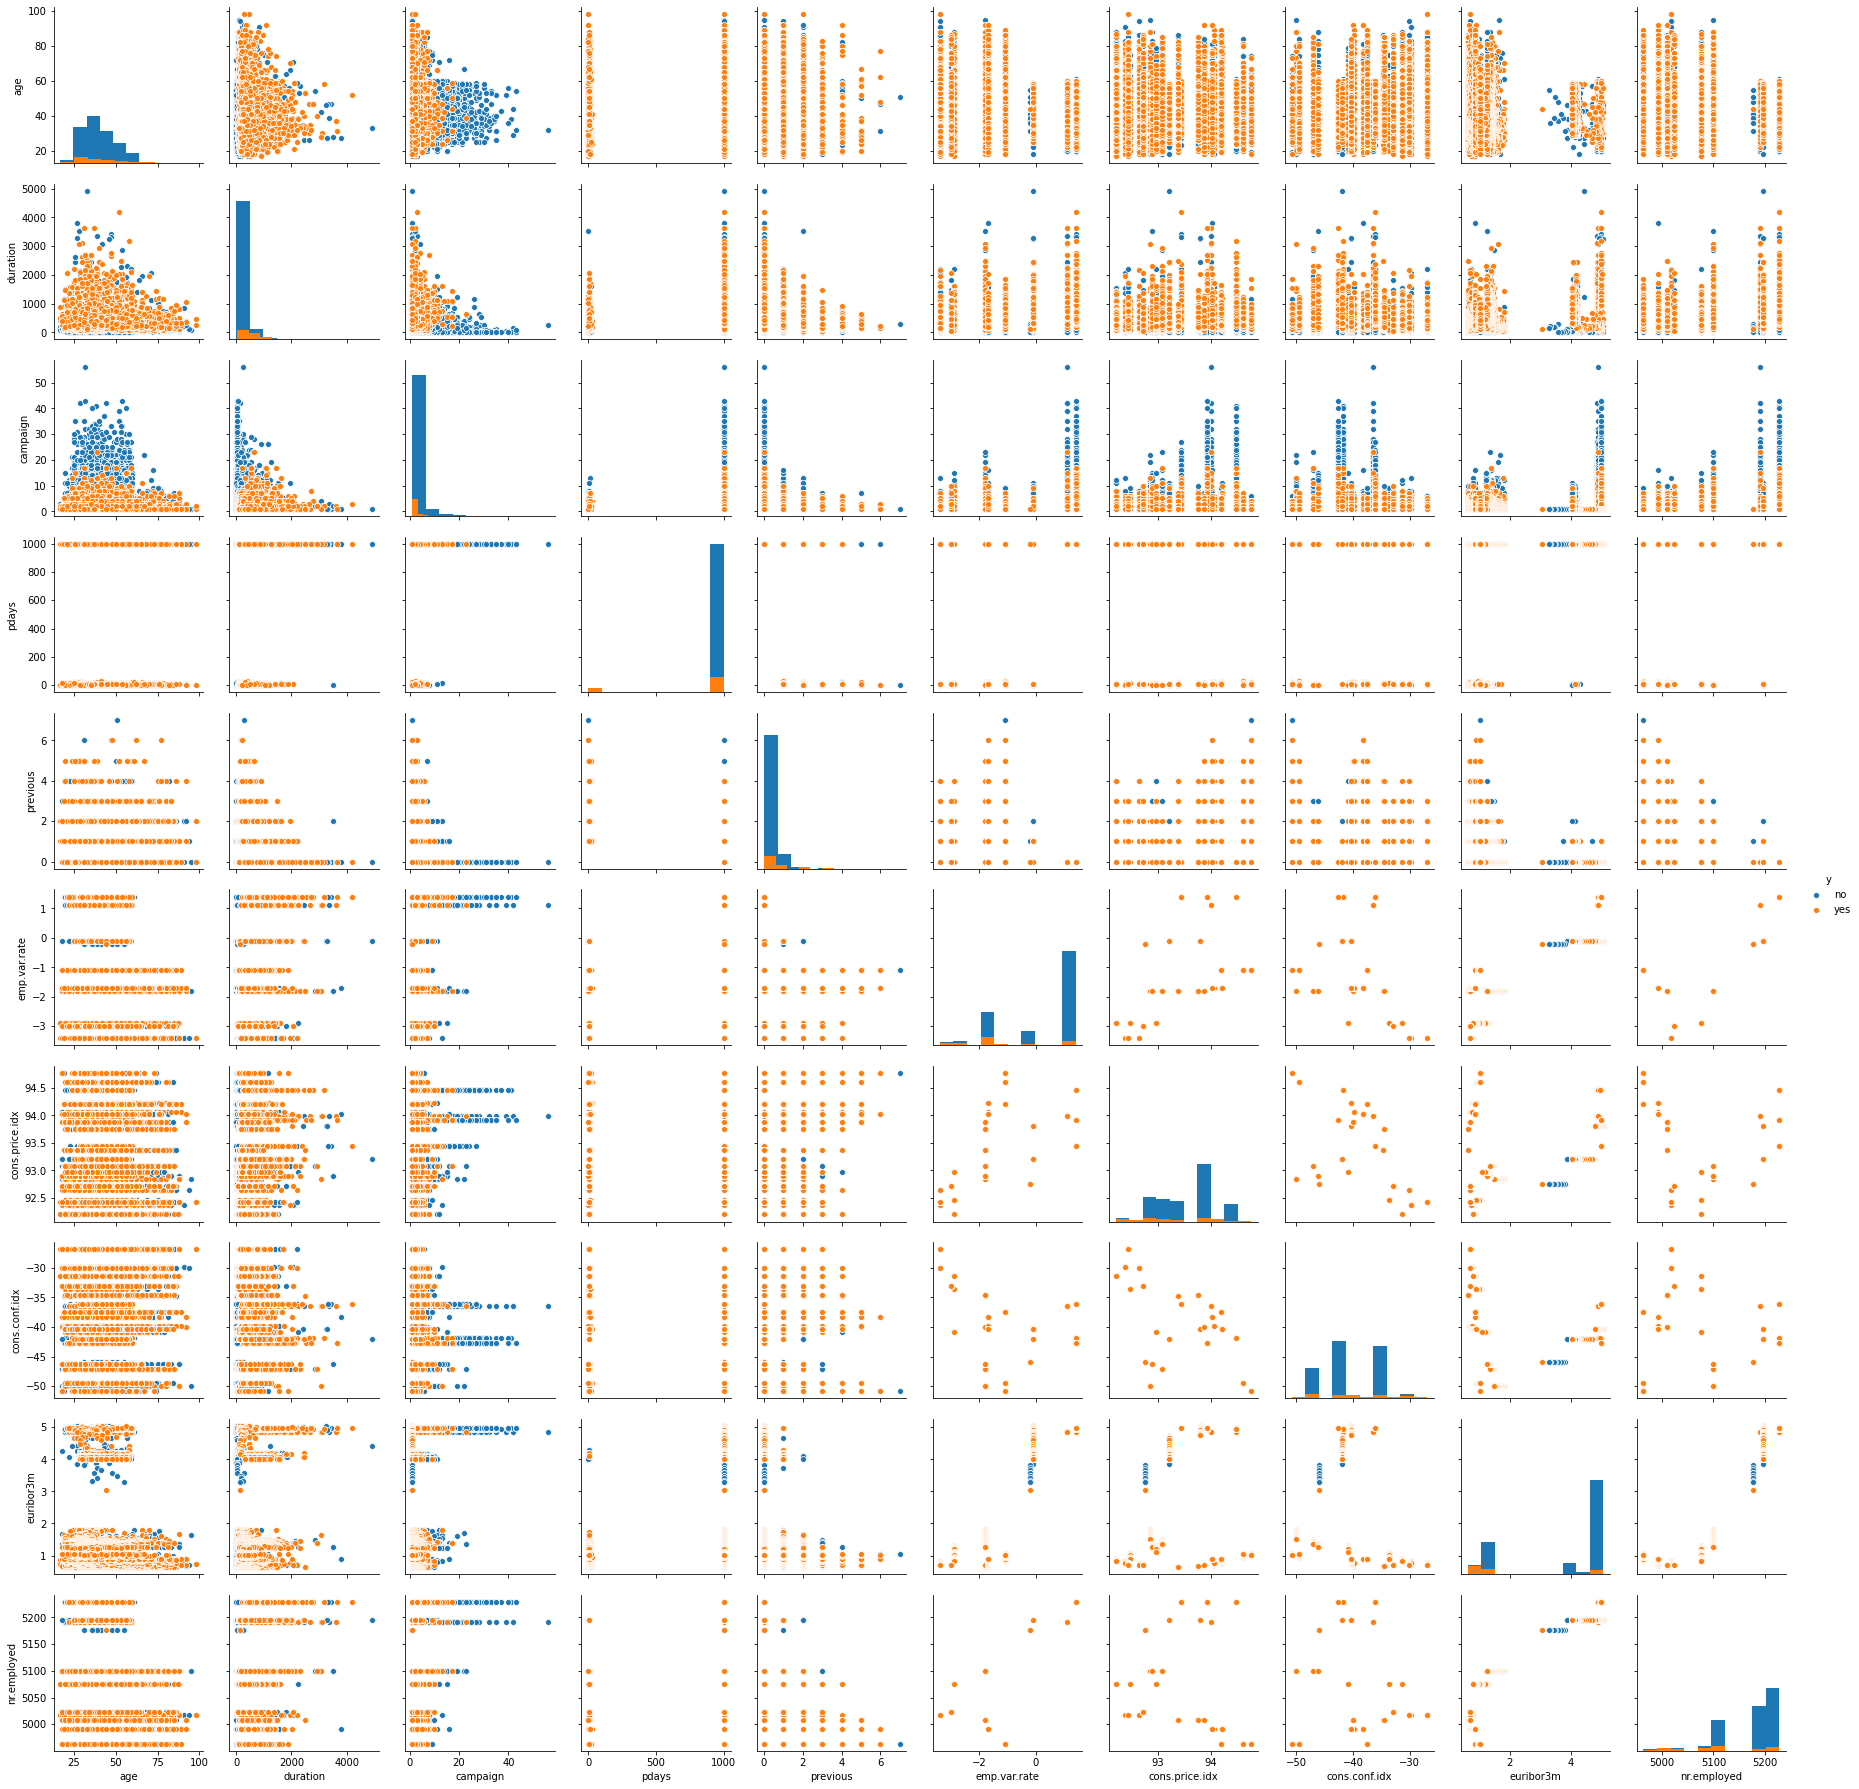

In [9]:
sns.pairplot(bank, diag_kind = 'hist', hue = 'y')

One particular thing we can see in here is that people who agreed to the offer usually have less number of contact (campaign) than people wo declined the offer.

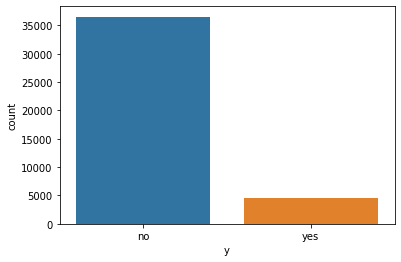

In [10]:
# Looking at the target
sns.countplot(bank['y'])

In [11]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

We can see that our dataset suffer from a class imbalance -- customers who declined to put the deposit is approximately nine times than customers that agree to the offer (88% : 11%).

## Basic plotting against the target
Although we made the pairplot already to see briefly the the connection among the features and target, here I will make a countplot (for categorical features) and distribution plot (for numerical features) against the target.

In [3]:
catcol = bank.select_dtypes(exclude = 'number').columns
numcol = bank.select_dtypes(exclude = 'object').columns

In [13]:
catcol

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [14]:
numcol

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

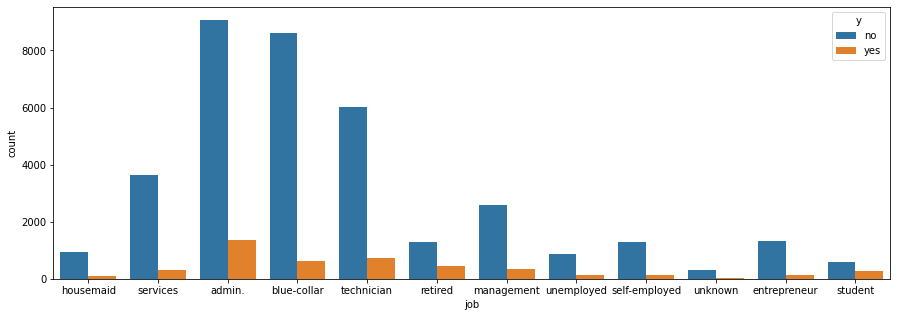

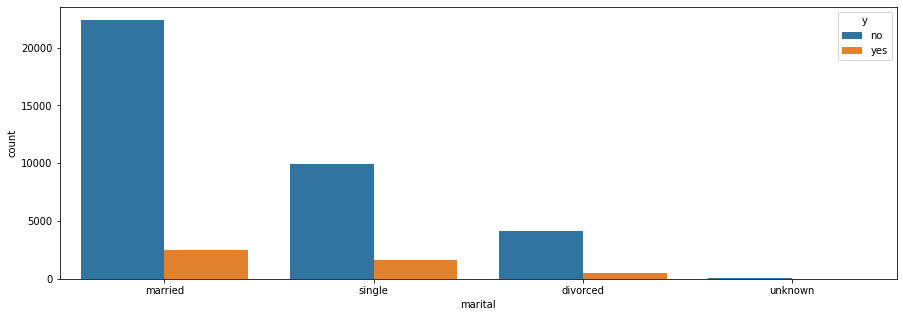

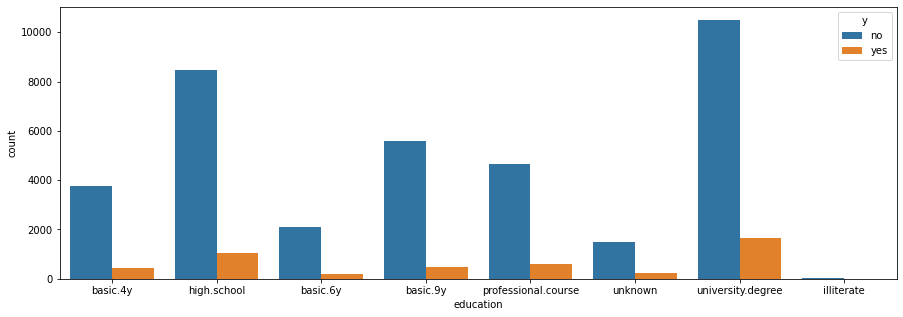

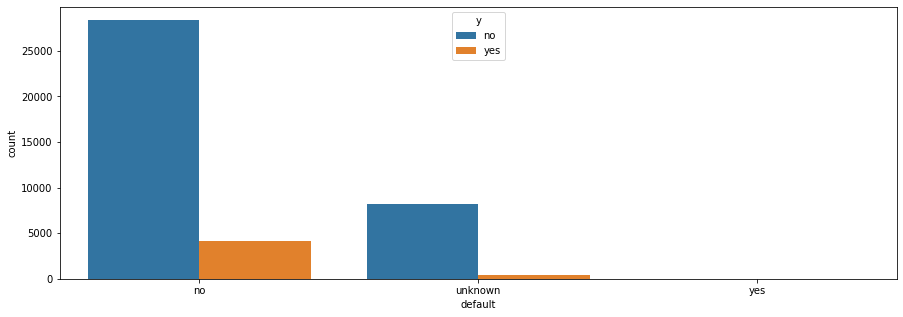

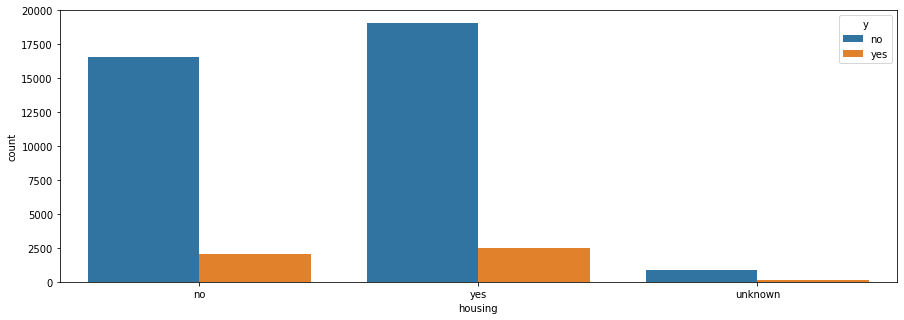

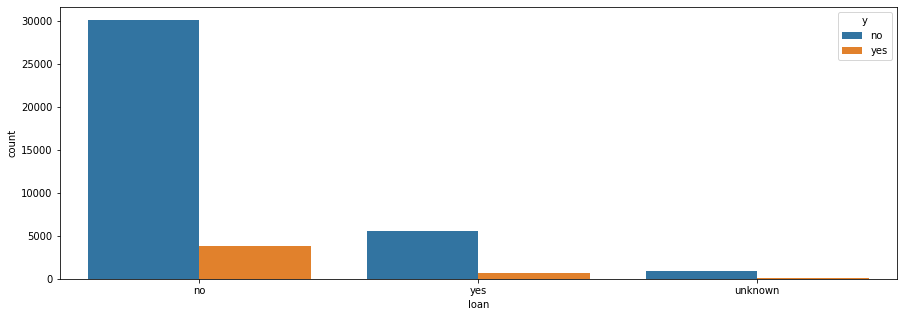

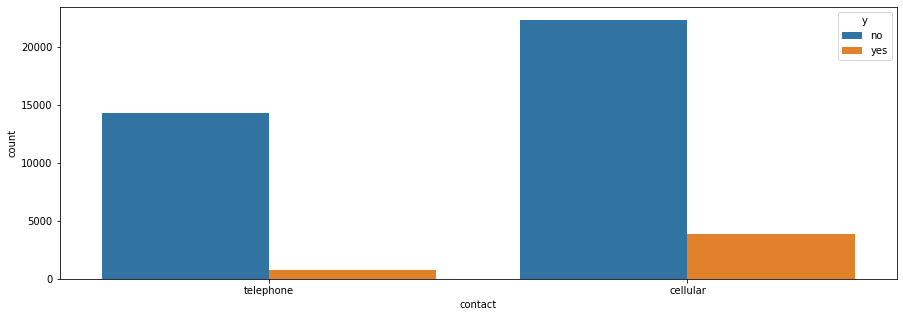

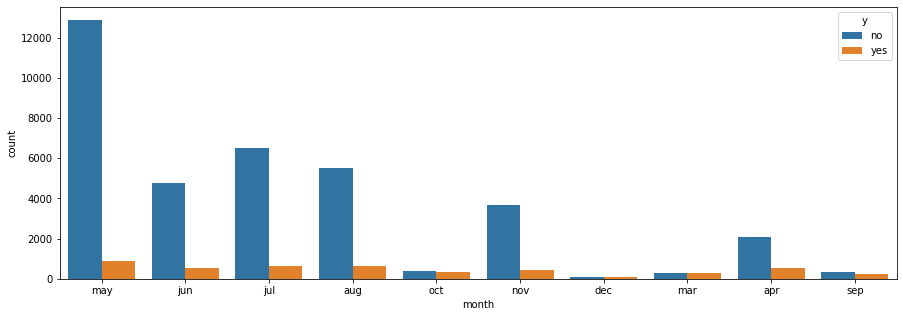

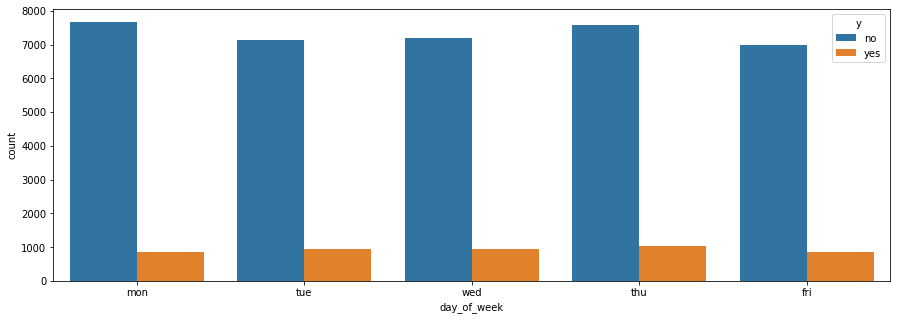

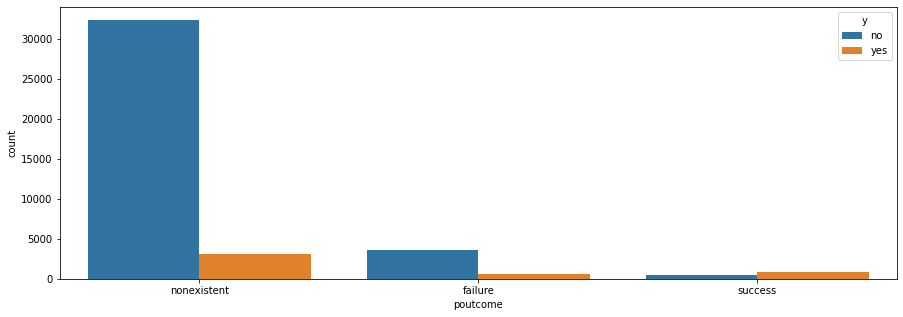

In [15]:
#visualization for categorical columns
# Class imbalance are the case in here -- thus of course blue bars (y = no) are higher than the orange bar
for i in catcol:
    if i == 'y':
        pass
    else:
        plt.figure(figsize = (15,5))
        sns.countplot(bank[i], hue = bank['y'])
        plt.show()

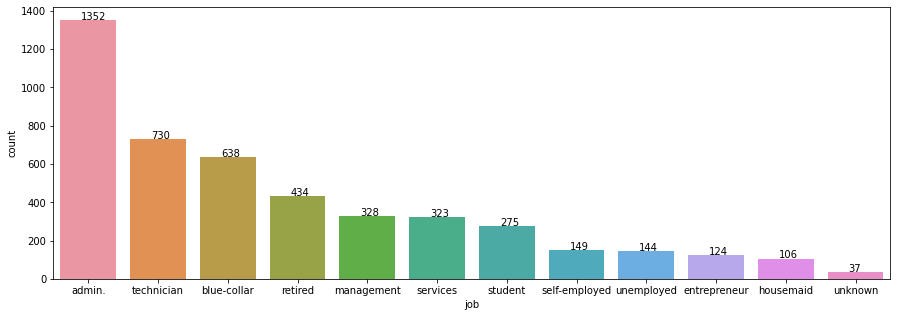

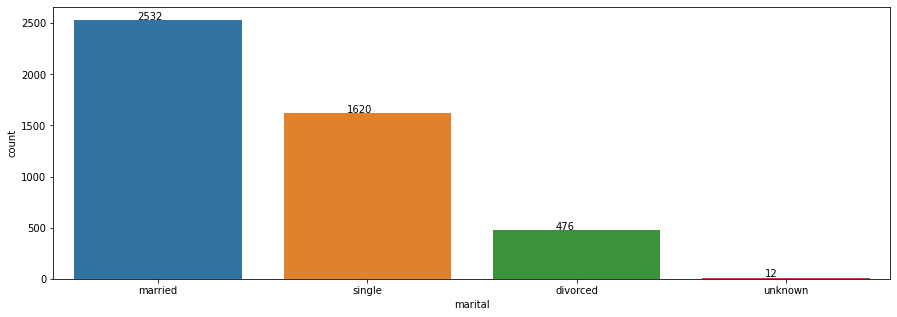

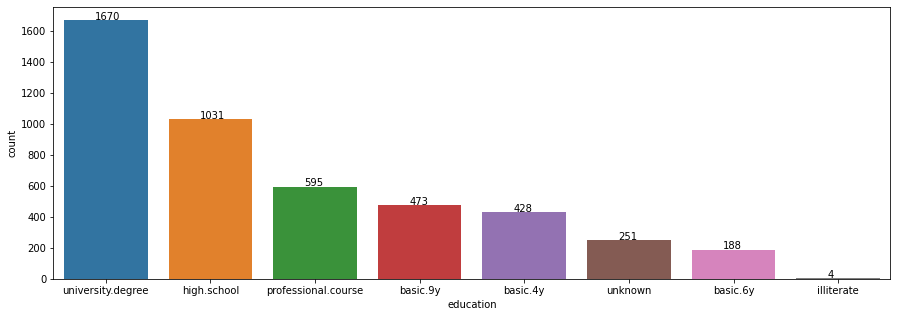

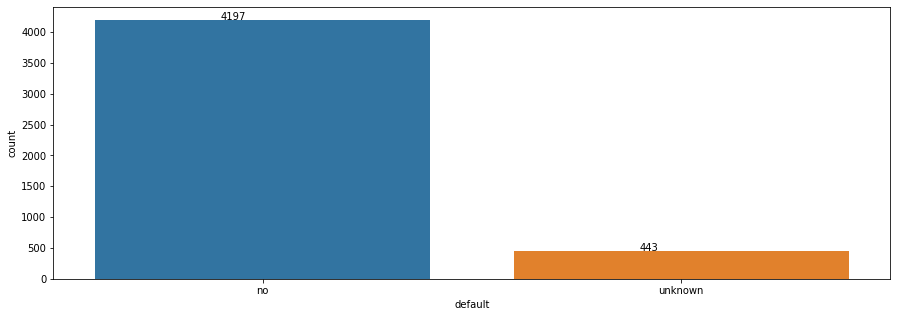

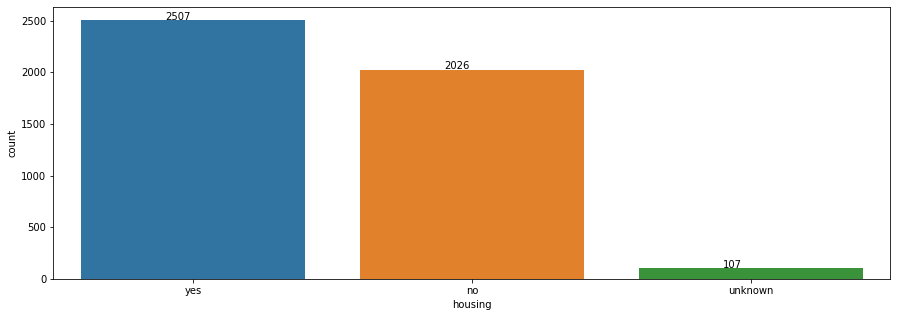

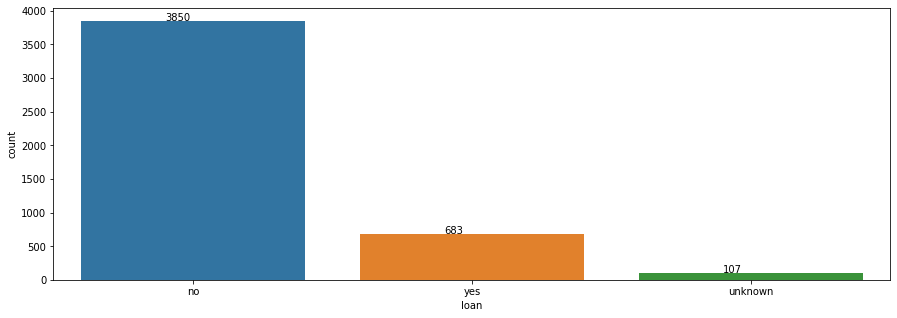

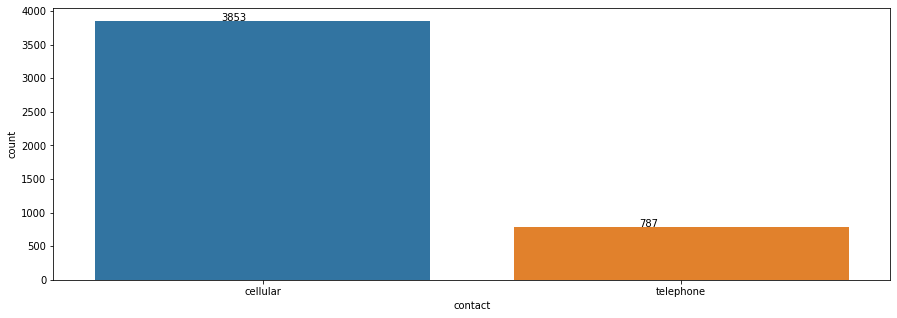

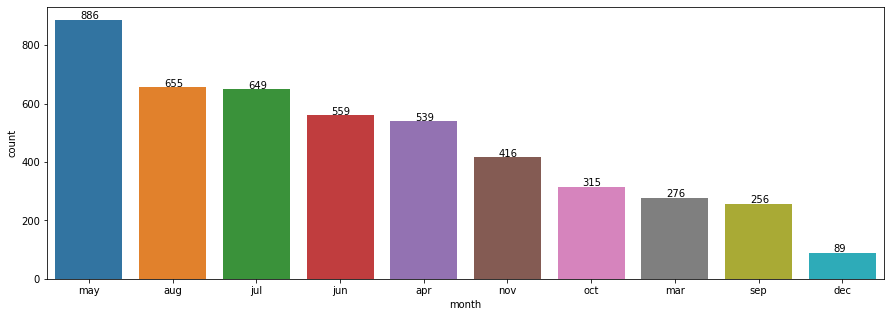

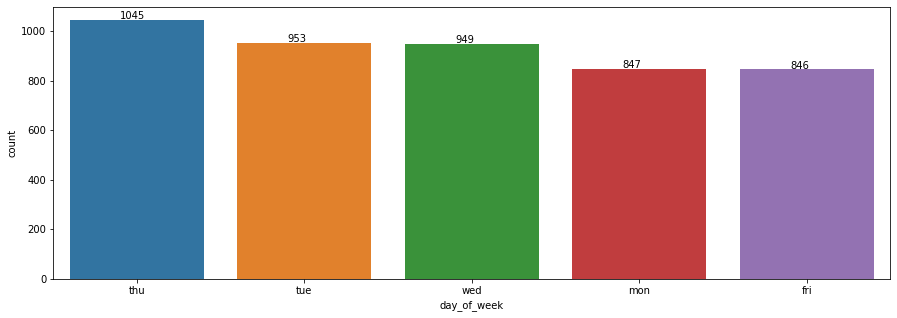

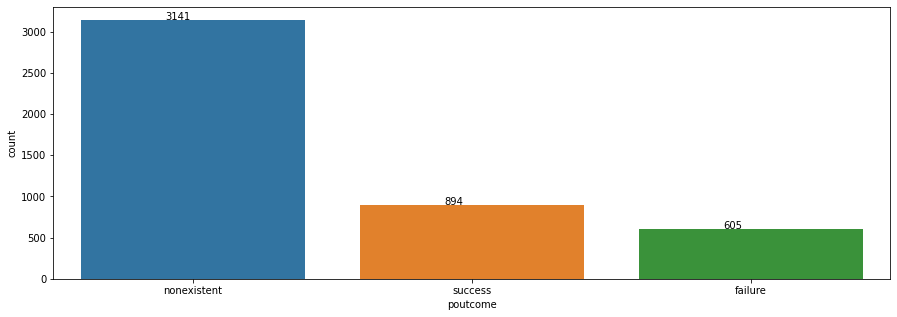

In [16]:
# Since it s distracting, let's make another plot only y = yes
for i in catcol:
    if i == 'y':
        pass
    else:
        plt.figure(figsize = (15,5))
        ax = sns.countplot(bank[bank['y'] == 'yes'][i], order =
               bank[bank['y'] == 'yes'][i].value_counts().index)

        for p, label in zip(ax.patches, bank[bank['y'] == 'yes'][i].value_counts()):
            ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

Here we can see that most people who agreed to put a deposit in the bank are (top 3 in descending order or top 1 for only 2 options):
1. Job: admin, technician, and blue collar
2. Marital status: Married, Single and Divorced
3. Education: University Degree, High School and professional course
4. Default: No
5. Housing: Yes 
6. Loan: No 
7. Contact: Cellular
8. Month: May, August and July -- there is no January and February
9. Day of the week: Thursday, Wednesday and Tuesday
10. Poutcome: Nonexistent

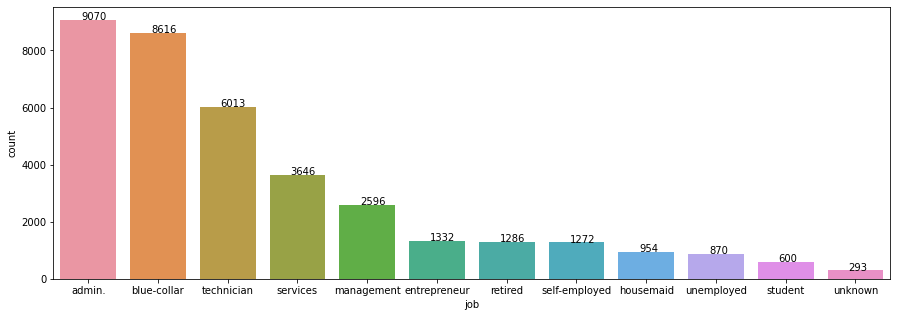

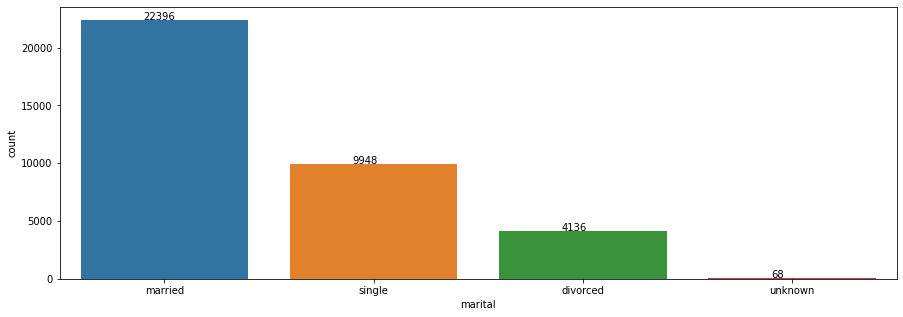

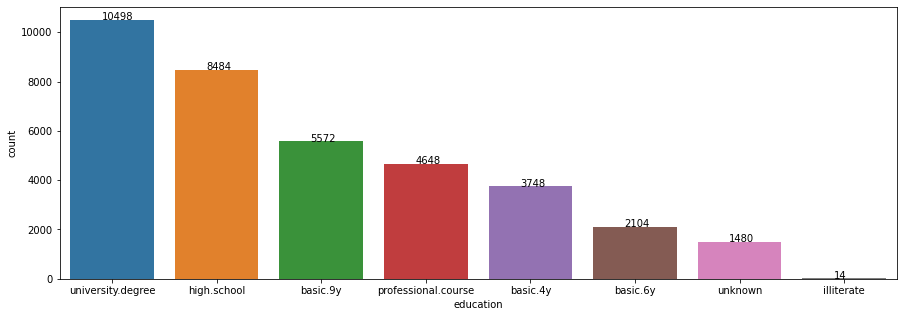

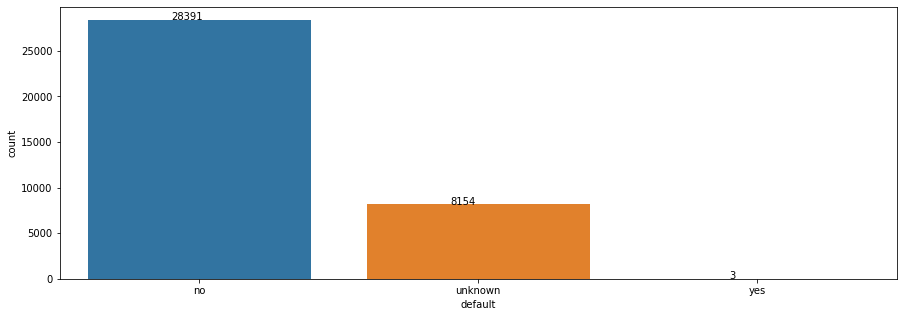

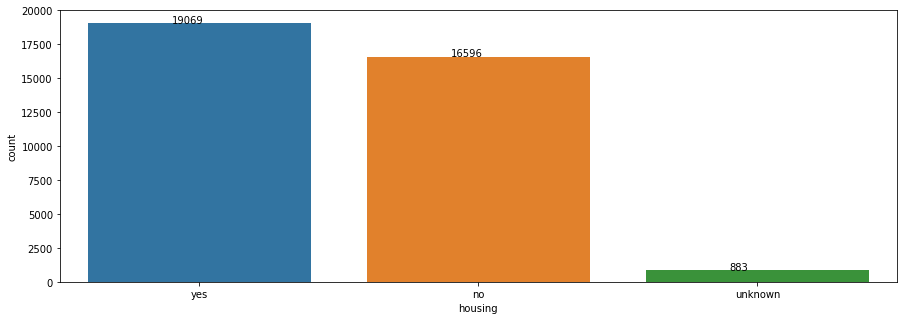

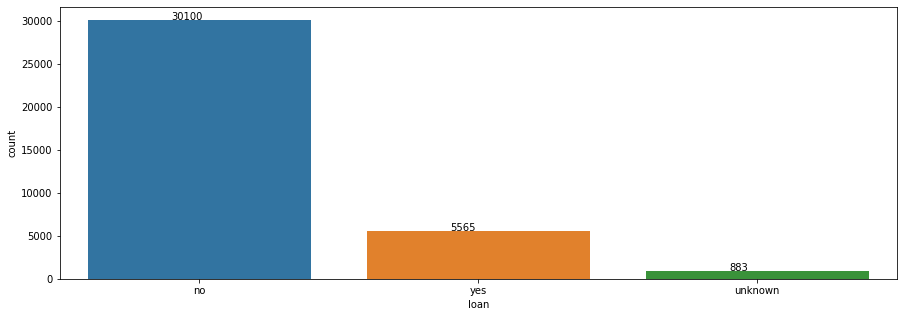

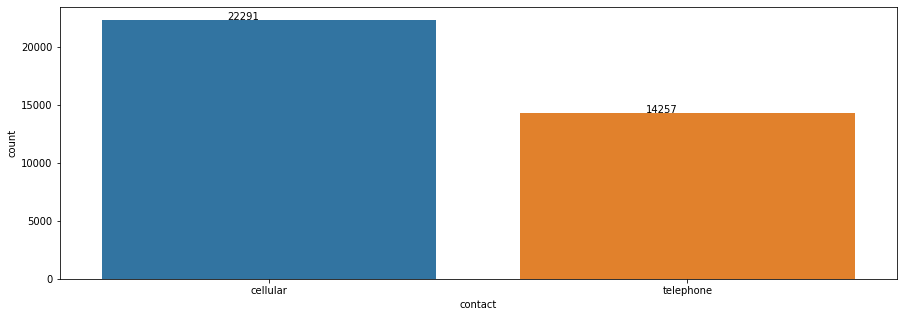

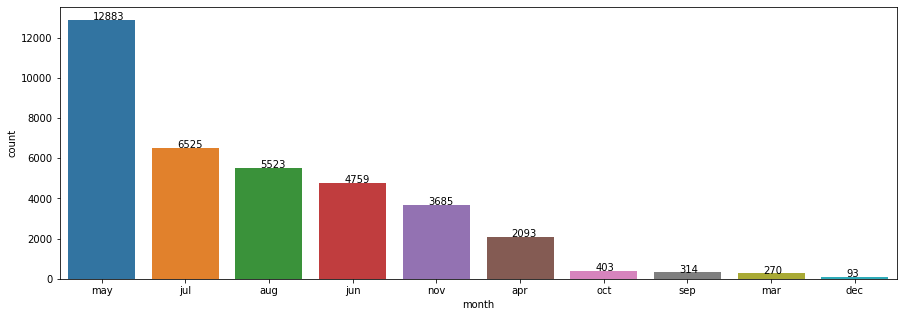

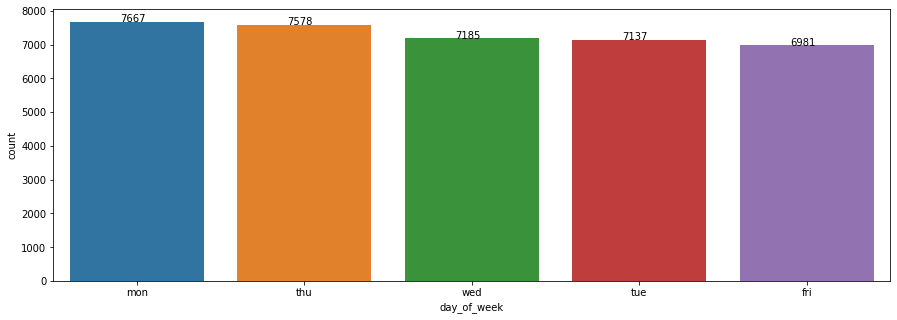

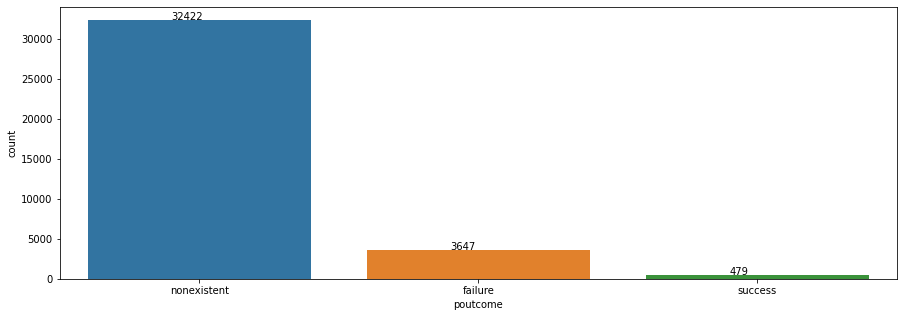

In [17]:
# Since it s distracting, let's make another plot only y = no
for i in catcol:
    if i == 'y':
        pass
    else:
        plt.figure(figsize = (15,5))
        ax = sns.countplot(bank[bank['y'] == 'no'][i], order =
               bank[bank['y'] == 'no'][i].value_counts().index)

        for p, label in zip(ax.patches, bank[bank['y'] == 'no'][i].value_counts()):
            ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

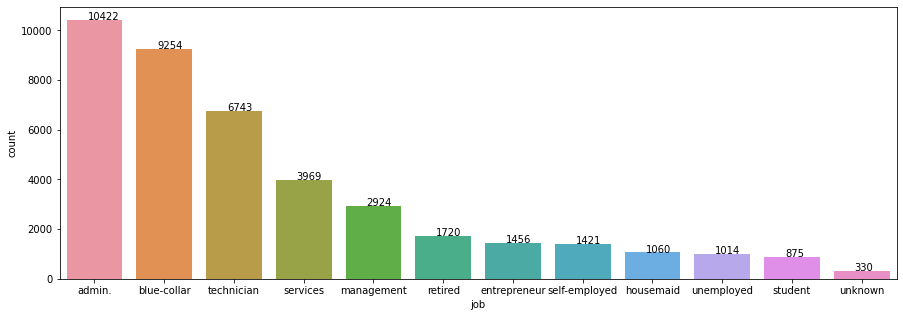

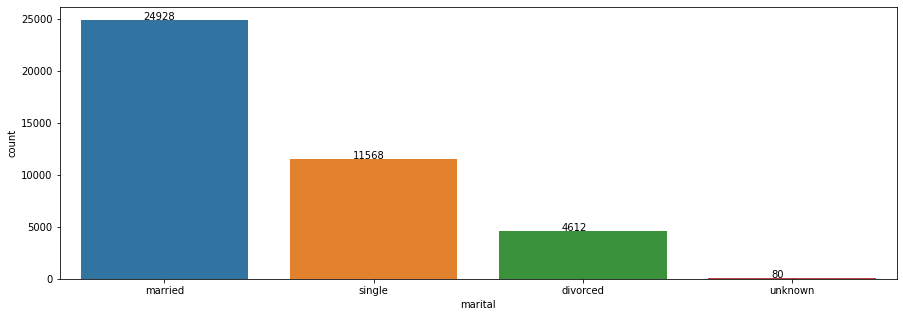

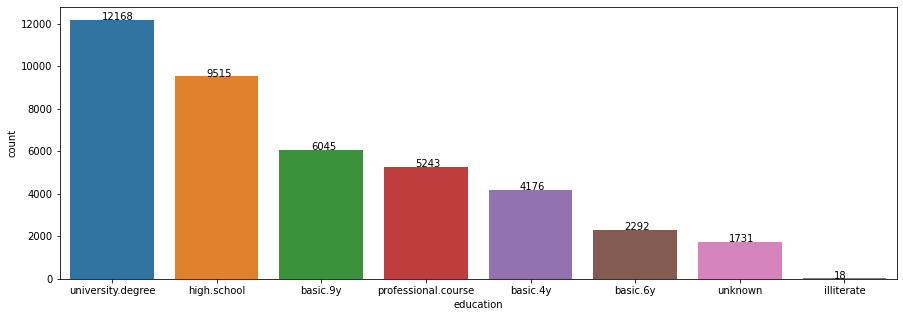

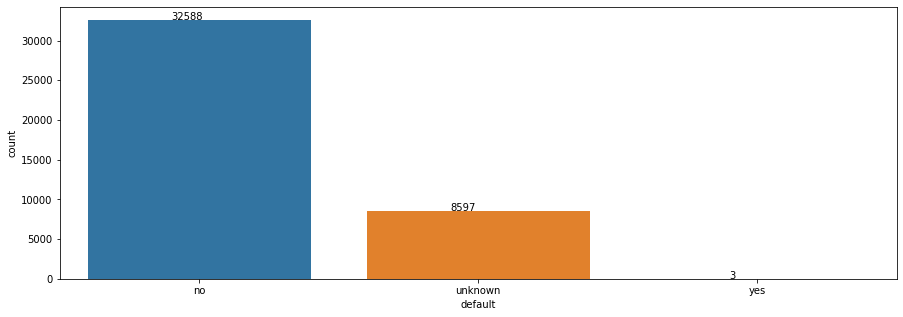

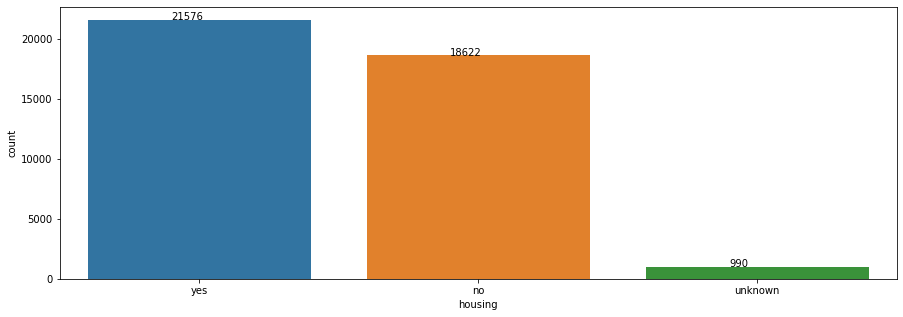

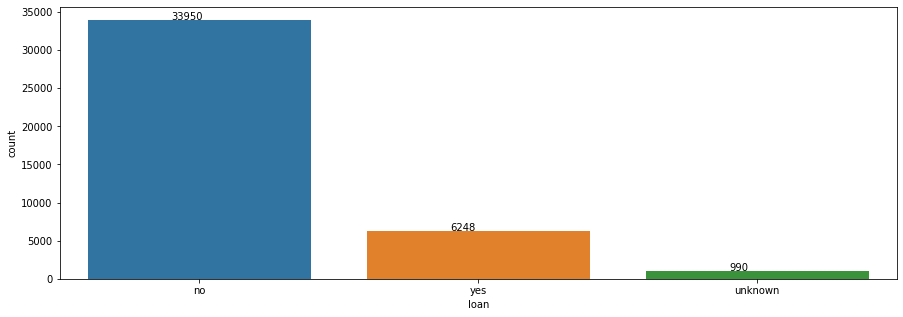

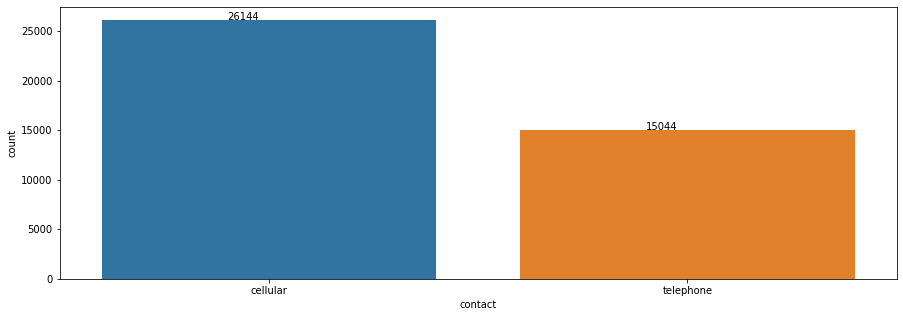

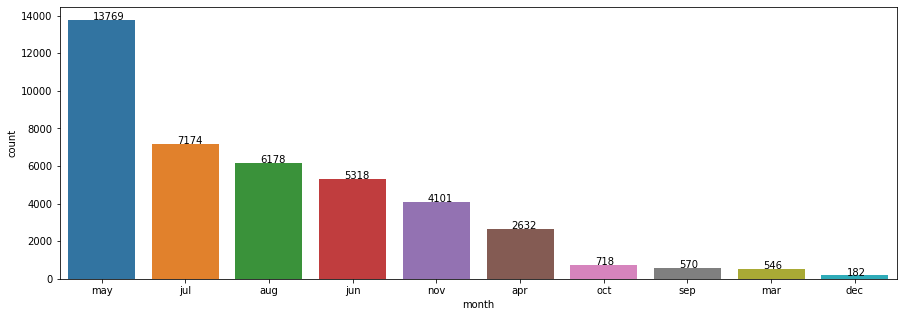

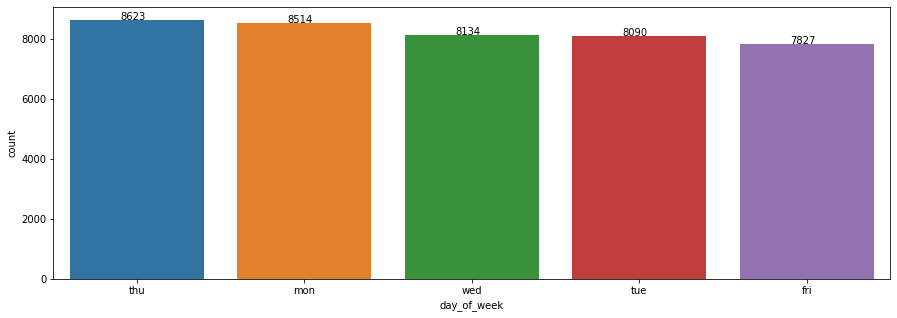

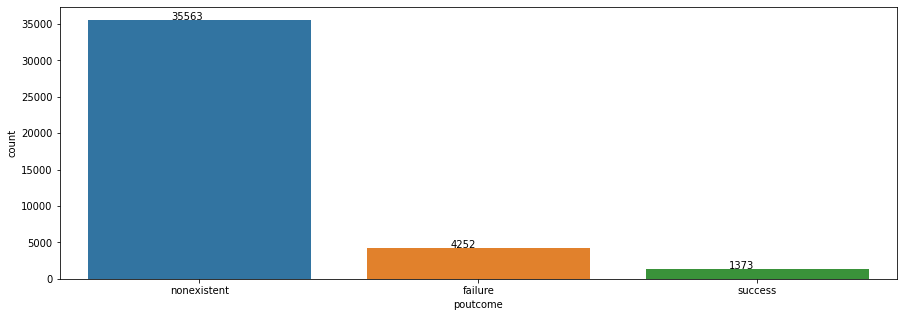

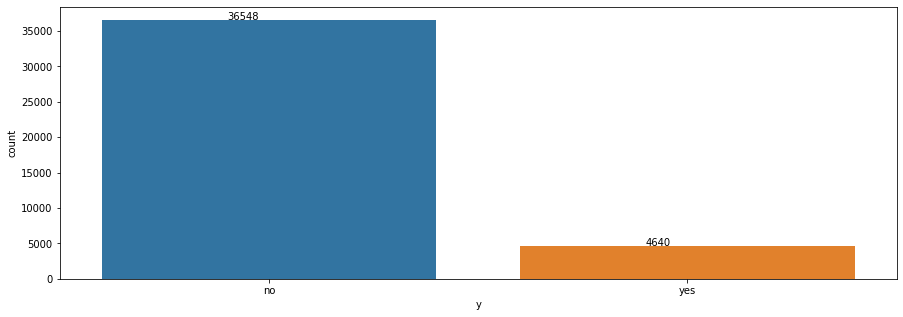

In [18]:
# Instead of separating the two classes in the target -- let's make an ordinary countplot
# to show us what kind of customers that are contacted by the bank institution - in a descending order

for i in catcol:
    plt.figure(figsize = (15,5))
    ax = sns.countplot(bank[i], order =
                   bank[i].value_counts().index)

    for p, label in zip(ax.patches, bank[i].value_counts()):
        ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

One particular thing we can observe here is in education, basic.9y is in the top 3 of the most contacted customers. However, the top 3 customers who agree on putting a deposit are more from basic.4y, compared to basic.9y.

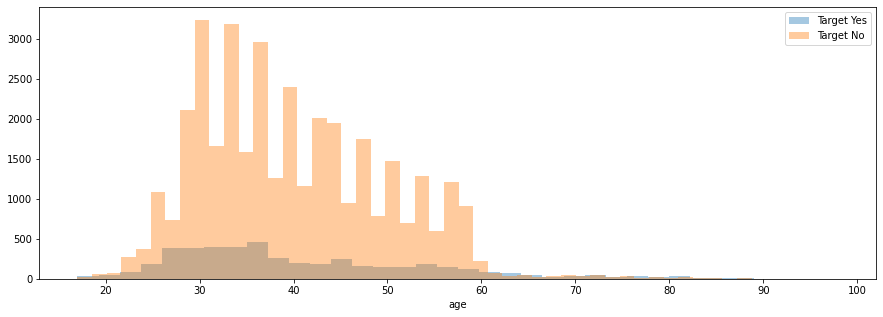

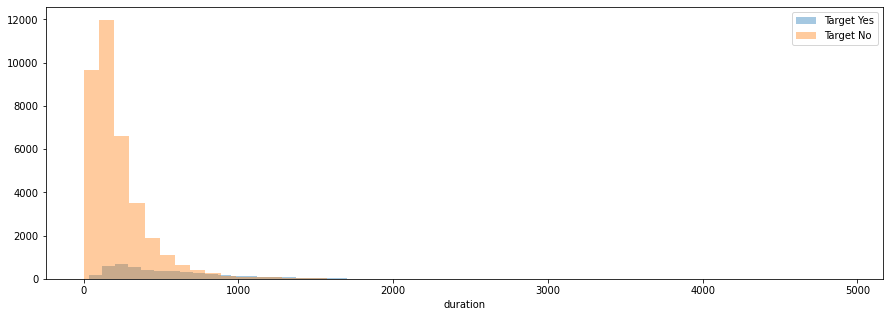

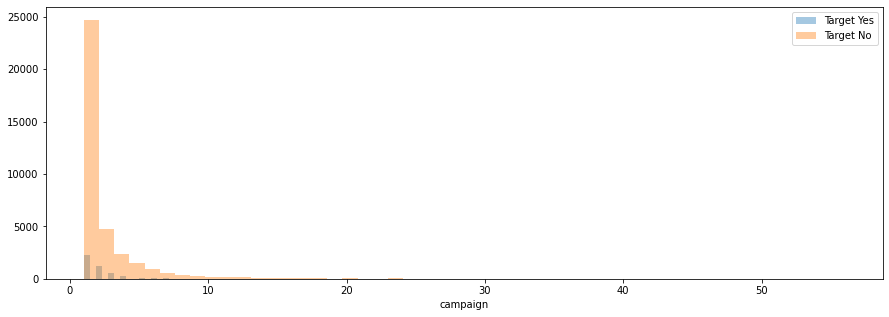

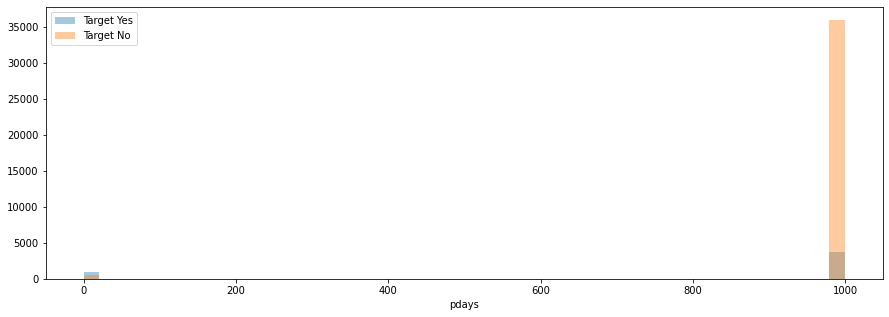

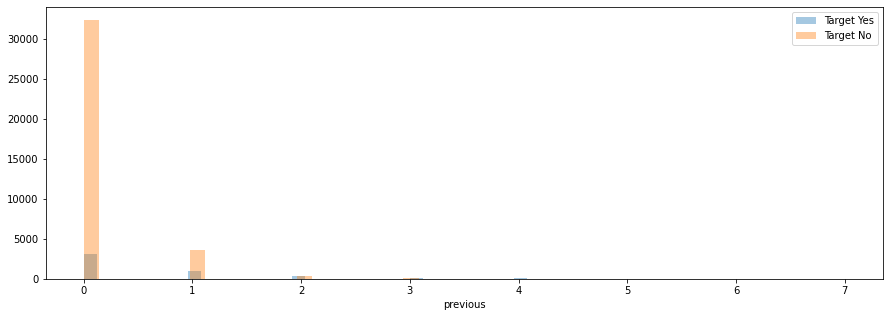

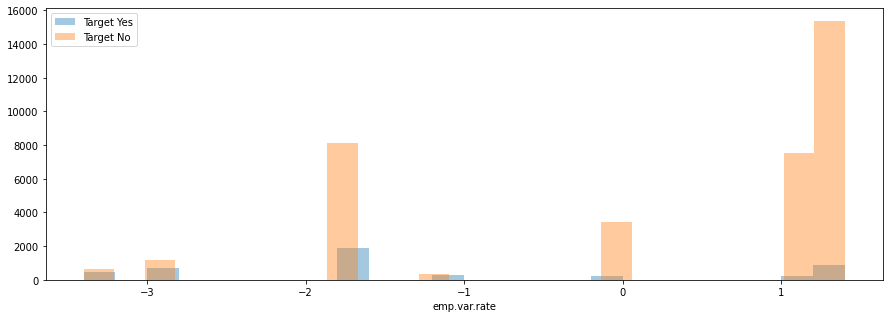

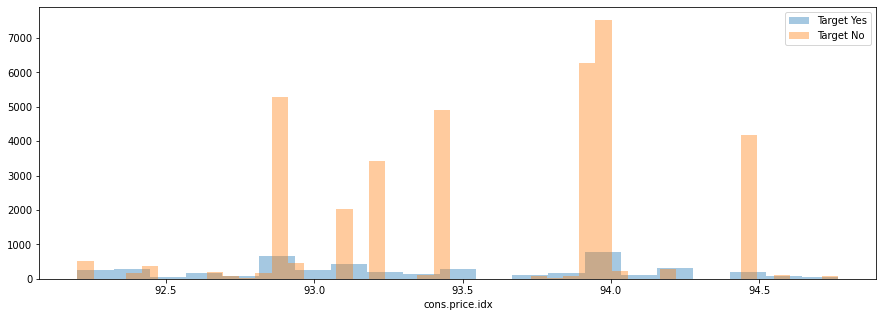

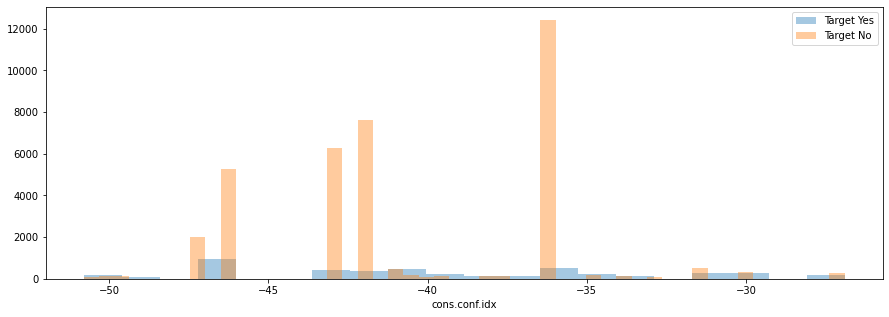

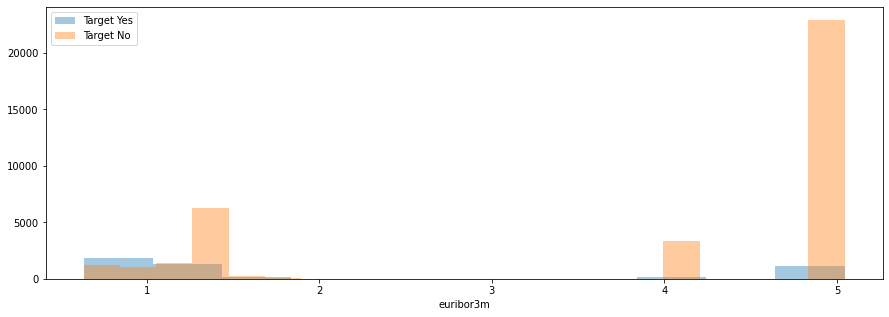

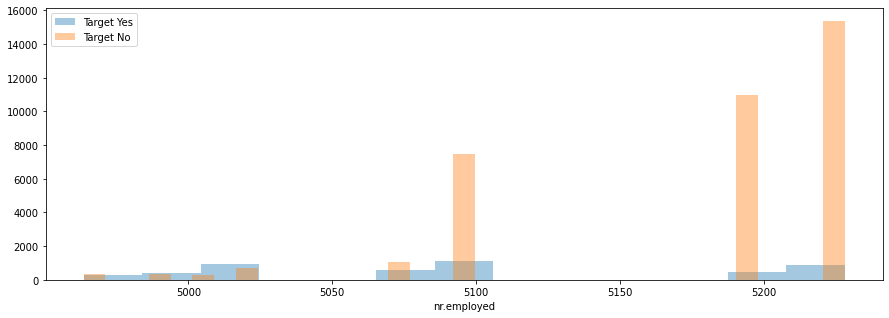

In [19]:
#Now let's move on to the numerical columns -- with both class of target

for i in numcol:
    plt.figure(figsize = (15,5))
    sns.distplot(bank[bank['y'] == 'yes'][i], kde = False, label = 'Target Yes')
    sns.distplot(bank[bank['y'] == 'no'][i], kde = False, label = 'Target No')
    plt.legend()
    plt.show()


From a brief observation, we can see the same pattern as categorical columns, that class-imbalance influence the plot (Target No definitely is the majority). However the distribution of the numerical columns are not extremely different between the two classes. We can see distribution differences in the socio-economic columns: cons.price.idx, cons.conf.idx, and nr.employed, where the distribution values from the Target Yes are wider compared to Target No. For numerical columns, it is more evident to see the differences between Target Yes and Target No through statistical analysis.

## Features: in depth

In order to understand fully about our data, I would like to observe in detail about the dataset. Both in numerical and categorical. The insight obtained from this dataset will hopefully help us to process the data further. Some of the information obtained in this section could probably overlapped with the raw observation above.

# Numerical Features 

In [20]:
numcol

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

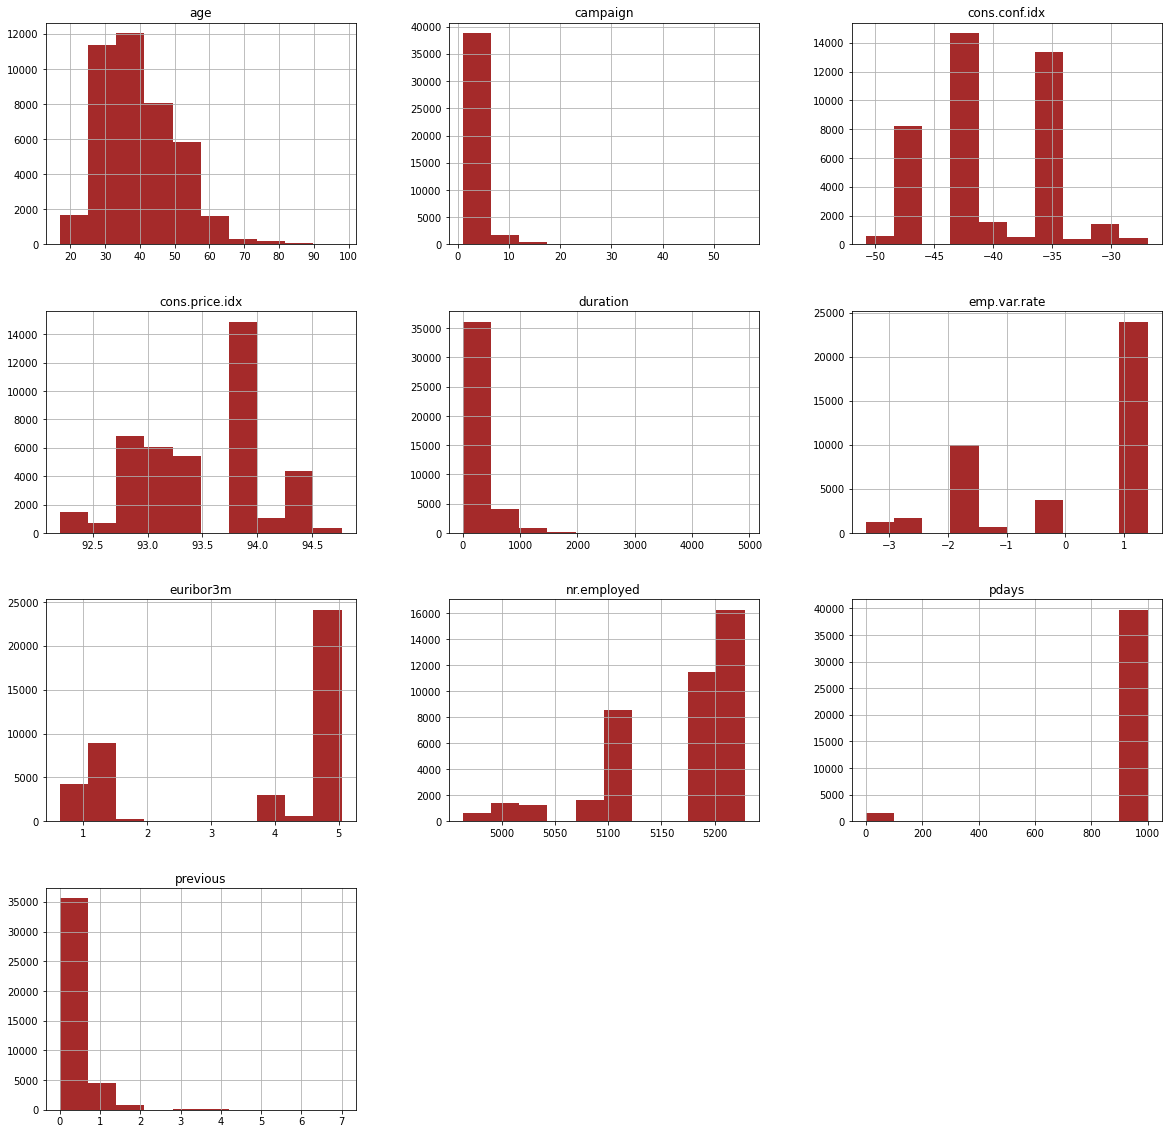

In [21]:
bank.hist(figsize=(20,20), color = 'brown')
plt.show()

> From these plots, briefly we see that none of the features follow the normal distribution. Many of the features, instead of continuous, the distributions can be considered as separated (e.g emp.var.rate, nr.employed, pdays).

> Although I made the distribution plot already, this time I will do the same approach (plotting against the target), but with a boxplot

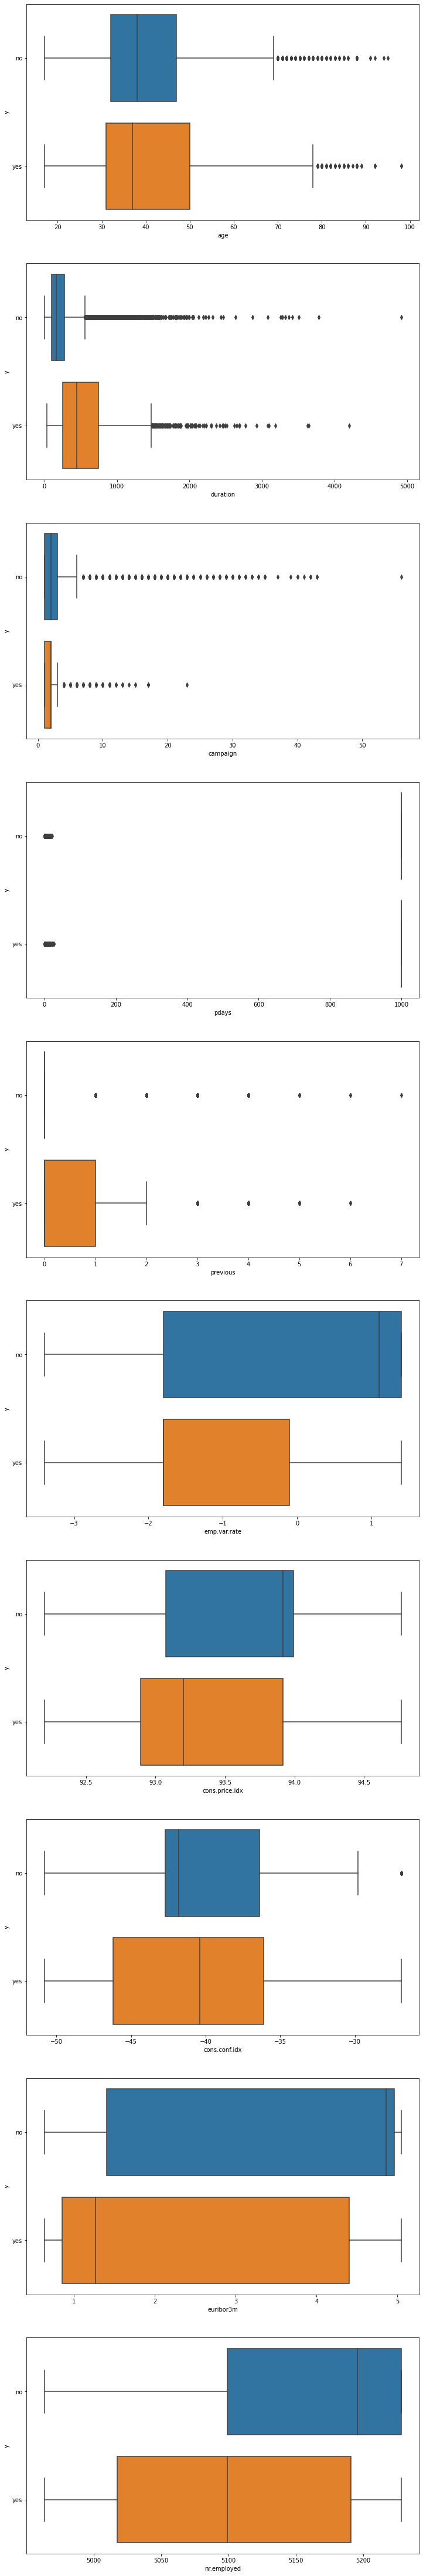

In [22]:
fig,axes=plt.subplots(len(numcol),1,figsize=(12,8*len(numcol)))
for col,axe in zip(numcol,axes):
    sns.boxplot(x=col,data=bank,y='y',ax=axe)

In [7]:
bank[bank['y'] == 'yes']['emp.var.rate'].describe()

count    4640.000000
mean       -1.233448
std         1.623626
min        -3.400000
25%        -1.800000
50%        -1.800000
75%        -0.100000
max         1.400000
Name: emp.var.rate, dtype: float64

> Using boxplot we can see distinction in our numerical columns in terms of the target (Yes or No). Some of interesting insights:

* Age: Similar with the distribution plot, there is not much difference in age between the Target Yes and Target No. Here we can also see that older people are considered as outliers.

* Duration: The duration of calls are shorter for Target No (excluding the outliers)

* Campaign : Many outliers can be observed

* previous: Positive previous calls for Target No are considered as outliers

* pdays: We can see here that there is no box for both Targets. Similar with what we saw in the histogram above, that a lot of 999 value in the datasets.

* euribor3m: The median values of Target Yes and Target No are on different pole.

## Correlation

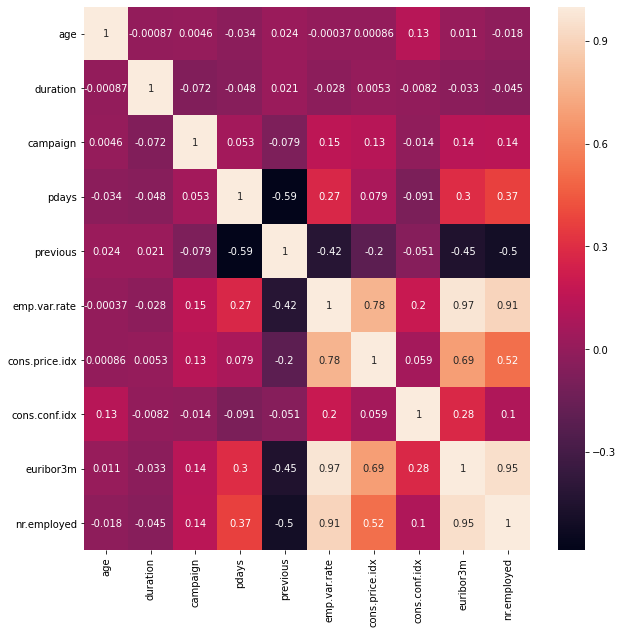

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(bank.corr(), annot = True)

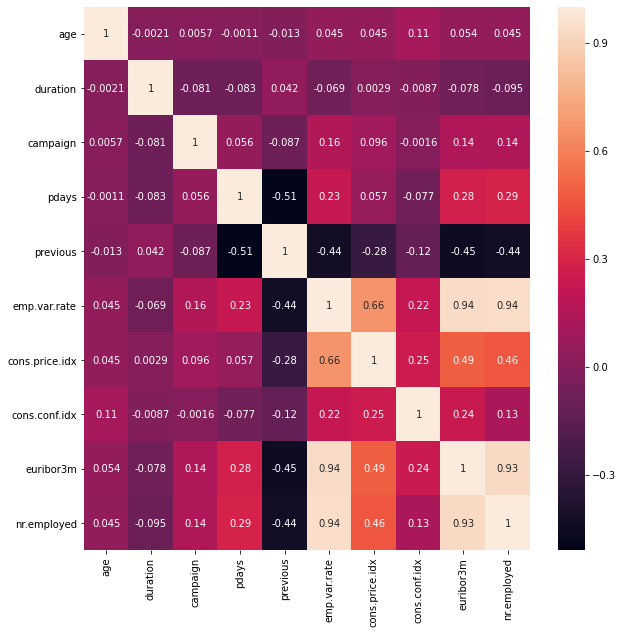

In [24]:
# Since from the histograms above none of the numerical columns are following normal dsitribution, let's see the correlation
# using spearman method

plt.figure(figsize = (10,10))
sns.heatmap(bank.corr(method = 'spearman'), annot = True)

From the heatmap, we can see that:
* The socio-economic features are positively (some are strongly,  such as euribor3m, nr.employed, emp.var.rate) correlated with each other. 
* Slight positive correlation between campaign and pdays to the socio-economic features can also be observed. 'previous' feature has mostly negative correlation with pdays and socio-economic features. However, for now we can not really say what is the reason behind this, since previous is a feature related to the customer, while socio-economic features are not influenced by a particular customer -- it is the social economic in Portugal society. 
* Age and durations are the only features that do not appear to be correlated with any other features.

> Let's see individual numerical features that are 'suspicious': pdays, previous, campaign, and socio-economic features (emp.var.rate, euribor3m, conf.cons.idx, cons.price.idx, and nr.employed)

### pdays -- number of days passed since consumers being contacted from previous campaign

In [25]:
bank['pdays'].value_counts().head(5)

## 96% of the consumers were not being contacted from previous campaign (code 999)

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

In [26]:
bank[bank['pdays'] == 999]['y'].value_counts()

no     36000
yes     3673
Name: y, dtype: int64

In [27]:
bank[bank['pdays'] != 999]['y'].value_counts()

yes    967
no     548
Name: y, dtype: int64

In [28]:
bank['pdays'].nunique()

27

Text(0.5, 1.0, 'Days Passed since Last Contact from previous campaign')

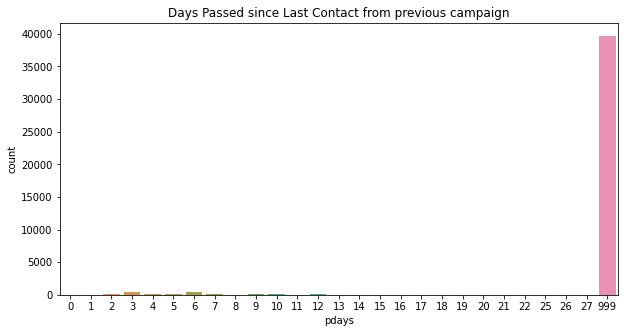

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(bank['pdays'])
plt.title('Days Passed since Last Contact from previous campaign')

In [30]:
pd.DataFrame(bank.groupby('pdays')['y'].value_counts()).T

pdays 0      1       2        3        4       5        6        7       8    \
y     yes no  no yes yes  no  yes   no yes  no yes  no  yes   no yes  no yes   
y      10  5  18   8  37  24  298  141  63  55  29  17  289  123  40  20  12   

pdays    9       10      11      12      13     14     15     16     17       \
y     no yes  no yes  no yes  no  no yes yes no yes no yes no yes no  no yes   
y      6  35  29  30  22  15  13  32  26  28  8  11  9  16  8   6  5   6   2   

pdays 18     19      20  21  22     25  26  27     999        
y     yes no  no yes  no yes yes no yes yes yes     no   yes  
y       4  3   2   1   1   2   2  1   1   1   1  36000  3673

There is a pdays = 0, which I assume customers were contacted on that day (thus there is no 'previous days'). In general, we can see that people who have been contacted tended to say Yes to the offer. Here from the groupby methode we can see that the number of people being contacted (and those who are Target Yes or No) are in a smaller scale compared to the code 999. Moreover, there is only single data in some of the days. It will make our model later difficult to generalize. 

> <b>NOTE </b> Since our last goal is putting the data into machine learning, for that purpose I will categorize values in pdays feature as : 
* 0 (not contacted/code 999) 
* 1 (contacted/code != 999).

### previous -- number of contact performed before this current campaign

In [31]:
bank['previous'].value_counts()

#86% of the customers were not contacted before this campaign

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Text(0.5, 1.0, 'Number of contacts performed before this campaign')

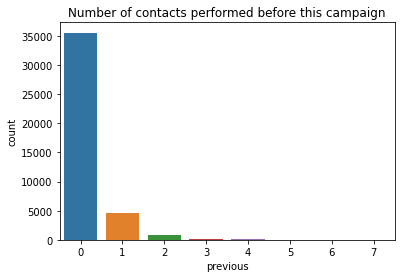

In [58]:
sns.countplot(bank['previous'])
plt.title('Number of contacts performed before this campaign')

In [33]:
pd.DataFrame(bank.groupby('previous')['y'].value_counts()).T

previous      0           1         2         3       4       5      6     7
y            no   yes    no  yes   no  yes  yes  no yes  no yes no yes no no
y         32422  3141  3594  967  404  350  128  88  38  32  13  5   3  2  1

### Campaign -- number of contact performed in the current campaign

In [34]:
bank['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

Text(0.5, 1.0, 'Number of Contacts performed in Current Campaign')

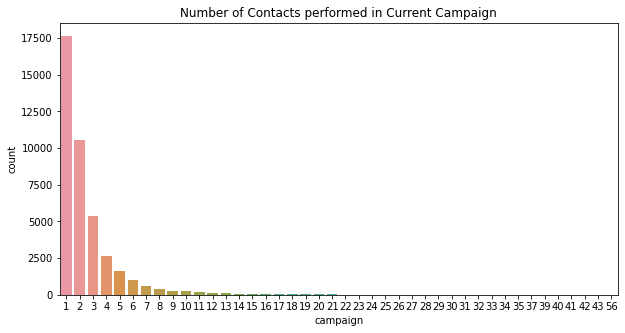

In [4]:
plt.figure(figsize = [10,5])
sns.countplot(bank['campaign'])
plt.title('Number of Contacts performed in Current Campaign')

Text(0.5, 1.0, 'Number of Contacts performed in Current Campaign - Target No')

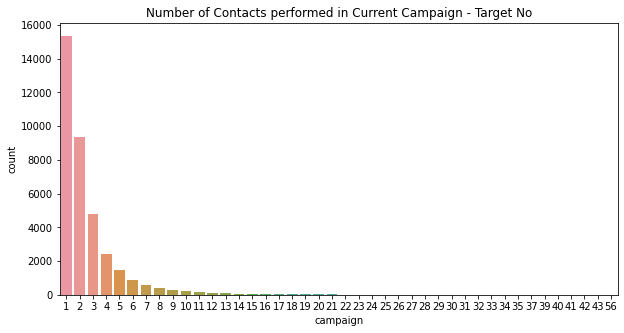

In [5]:
plt.figure(figsize = [10,5])
sns.countplot(bank[bank['y'] == 'no']['campaign'])
plt.title('Number of Contacts performed in Current Campaign - Target No')

Text(0.5, 1.0, 'Number of Contacts performed in Current Campaign - Target Yes')

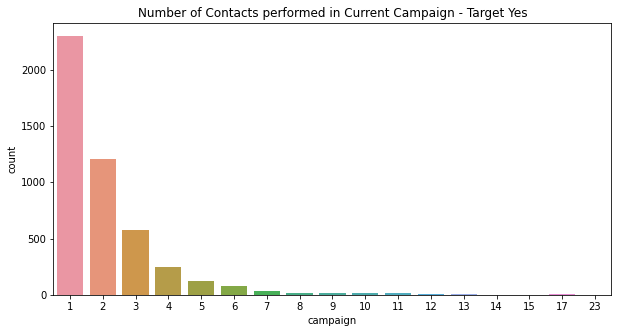

In [6]:
plt.figure(figsize = [10,5])
sns.countplot(bank[bank['y'] == 'yes']['campaign'])
plt.title('Number of Contacts performed in Current Campaign - Target Yes')

Here we can see that all customers were contacted at least once. Starting at 4 times, we can see that the data was going into much smaller numbers compared to 1-2-3. The pattern is the same for both Target No and Target Yes. Most customers were contacted once -- therefore influencing as well the Target Yes and Target No.

### Socio-economic Features

Text(0.5, 1.0, 'Correlations among the socio-economic features')

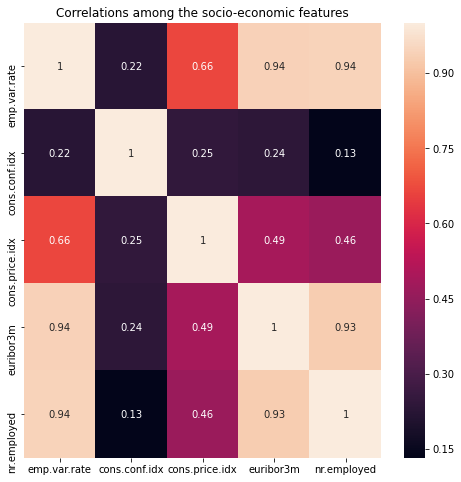

In [38]:
#First of all let's see the correlation once again
plt.figure(figsize = (8,8))
sns.heatmap(bank[['emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']].corr(method = 'spearman'),
           annot = True)
plt.title('Correlations among the socio-economic features')

> As we saw from previous heatmap, these features correlated positively with each other. Some are really strongly, such as among euribor3m, nr.employed, and emp.var.rate. 

> #### So what exactly do these features mean?
In order to understand further, we need to know about the socio-economic of Portugal.

### emp.var.rate (Employment Variation Rate)
* Unfortunately, there is no further explanation for this feature. At first I thought we can assume this into employment rate in Portugal.
* Based on OECD data, Employment rates are a measure of the extent to which available labour resources (people available to work) are being used. They are calculated as the ratio of the employed to the working age population.
* However, the values of emp.var.rate here do not resemble employment rates, because the latter values are much bigger
* Thus for now, we just leave it like that

In [39]:
#Last time we saw the histogram, this one was quite separated.

bank['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

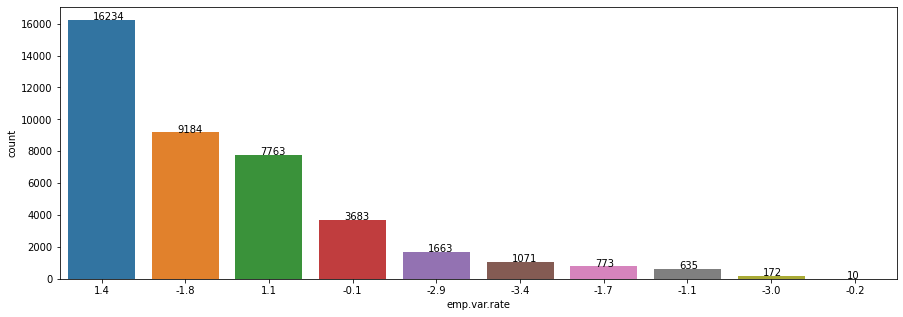

In [40]:
plt.figure(figsize = (15,5))
ax = sns.countplot(bank['emp.var.rate'], order =
               bank['emp.var.rate'].value_counts().index)

for p, label in zip(ax.patches, bank['emp.var.rate'].value_counts()):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

Text(0.5, 1.0, 'Employment Variation Rate')

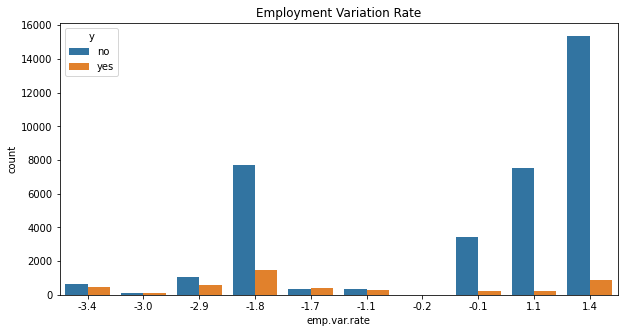

In [41]:
plt.figure(figsize = [10,5])
sns.countplot(bank['emp.var.rate'], hue = bank['y'])
plt.title('Employment Variation Rate')

In [42]:
pd.DataFrame(bank.groupby('emp.var.rate')['y'].value_counts()).T

emp.var.rate -3.4      -3.0      -2.9       -1.8       -1.7      -1.1       \
y              no  yes  yes  no    no  yes    no   yes  yes   no   no  yes   
y             617  454   88  84  1069  594  7723  1461  403  370  334  301   

emp.var.rate -0.2      -0.1        1.1         1.4       
y              no yes    no  yes    no  yes     no  yes  
y               9   1  3451  232  7523  240  15368  866

Here we can see that most customers were contacted when emp.var.rate is 1.4. However, Target Yes are more when the emp.var.rate is -1.8. Additionally, although this feature's type is numerical,it behaves more like categorical variable. But to assign this as categorical variable will be difficult for our machine, therefore I am considering to group them based on ordinality. Since -1.8 is considered important, it will be one of our possible cut-off.

### cons.conf.idx (Consumer Confidence Index) - Monthly Indicator
* In Portugal, the consumer confidence index is based on interviews with consumers about their perceptions of the country's current and future economic situation and their tendencies to purchase. 
* It is estimated using the difference between the share of positive evaluation responses and negative evaluation responses, but do not include the share of neutral responses.

In [43]:
#Last time we saw the histogram, this one was quite separated.

bank['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

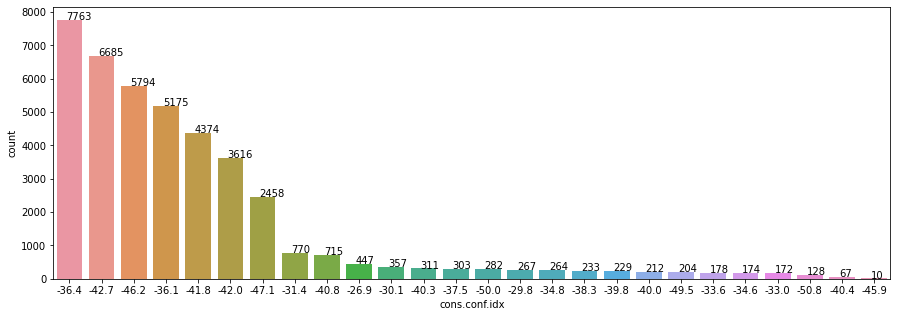

In [44]:
plt.figure(figsize = (15,5))
ax = sns.countplot(bank['cons.conf.idx'], order =
               bank['cons.conf.idx'].value_counts().index)

for p, label in zip(ax.patches, bank['cons.conf.idx'].value_counts()):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

Text(0.5, 1.0, 'Consumer Confidence Index')

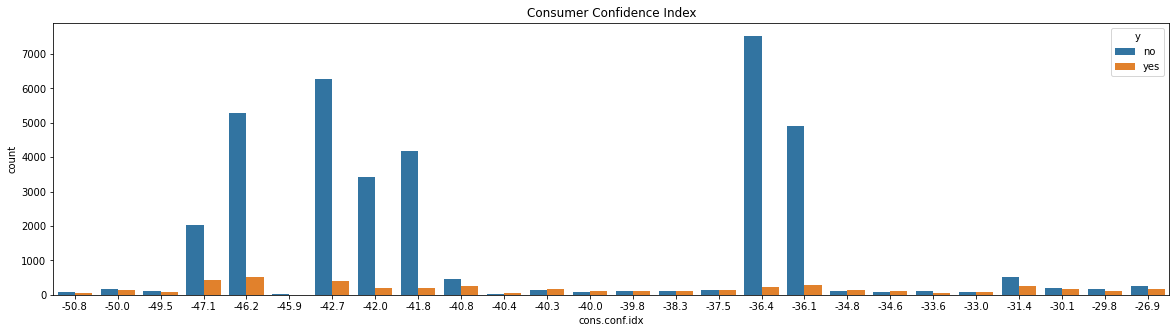

In [45]:
plt.figure(figsize = [20,5])
sns.countplot(bank['cons.conf.idx'], hue = bank['y'])
plt.title('Consumer Confidence Index')

Text(0.5, 1.0, 'Consumer Confidence Index')

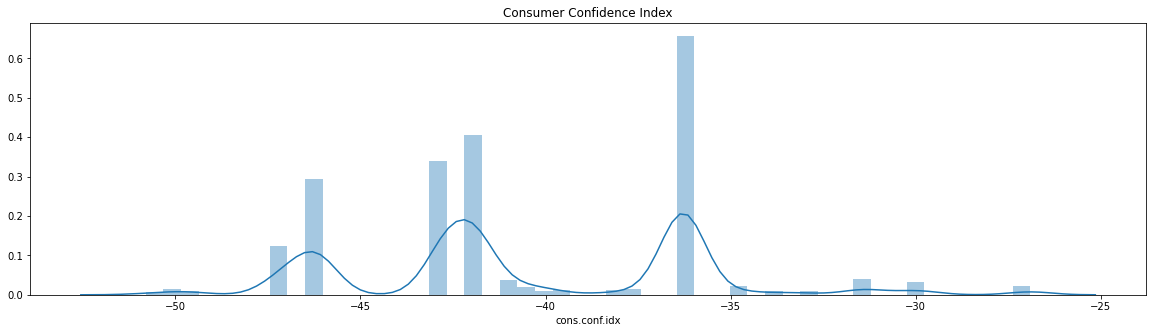

In [46]:
plt.figure(figsize = [20,5])
sns.distplot(bank['cons.conf.idx'])
plt.title('Consumer Confidence Index')

Here we can see that most of the consumers were contacted when the value cons.conf.idx -36.4. All values are in a negative state, I assume the bigger negative number indicates a bigger consumer confidence. However we could not infer that smaller negative number can yield more Target Yes -- since there is more Target Yes in a smaller cons.conf.idx value.  

From the distribution plot we can also observe that the curve is bi-modal (slightly multimodal). From the distribution plot as well, we can possibly divide the distribution into 3 distinct group, with -45 and -40 as the cut-off points.  

In [47]:
# Since it is a monthly indicator, let's group by month
pd.DataFrame(bank.groupby('month')['cons.conf.idx'].value_counts()).T

month           apr         aug               dec         jul              \
cons.conf.idx -47.1 -34.6 -36.1 -31.4 -38.3 -33.0 -45.9 -42.7 -40.3 -33.6   
cons.conf.idx  2458   174  5175   770   233   172    10  6685   311   178   

month           jun               mar         may               nov        \
cons.conf.idx -41.8 -40.8 -39.8 -50.0 -34.8 -36.4 -46.2 -40.0 -42.0 -30.1   
cons.conf.idx  4374   715   229   282   264  7763  5794   212  3616   357   

month                 oct               sep        
cons.conf.idx -50.8 -26.9 -49.5 -40.4 -37.5 -29.8  
cons.conf.idx   128   447   204    67   303   267

In [48]:
bank['cons.conf.idx'].nunique()

26

In [49]:
# Since it is a monthly indicator, let's group by month with the target
pd.DataFrame(bank.groupby(['month', 'y'])['cons.conf.idx'].value_counts())

cons.conf.idx
month y   cons.conf.idx               
apr   no  -47.1                   2016
          -34.6                     77
      yes -47.1                    442
          -34.6                     97
aug   no  -36.1                   4904
          -31.4                    506
          -38.3                    113
      yes -36.1                    271
          -31.4                    264
          -38.3                    120
dec   no  -33.0                     84
          -45.9                      9
      yes -33.0                     88
          -45.9                      1
jul   no  -42.7                   6278
          -40.3                    135
          -33.6                    112
      yes -42.7                    407
          -40.3                    176
          -33.6                     66
jun   no  -41.8                   4186
          -40.8                    451
          -39.8                    122
      yes -40.8                    264
          -41.8                    188
          -39.8                    107
mar   no  -50.0                    156
          -34.8                    114
      yes -34.8                    150
          -50.0                    126
may   no  -36.4                   7523
          -46.2                   5270
          -40.0                     90
      yes -46.2                    524
          -36.4                    240
          -40.0                    122
nov   no  -42.0                   3426
          -30.1                    189
          -50.8                     70
      yes -42.0                    190
          -30.1                    168
          -50.8                     58
oct   no  -26.9                    267
          -49.5                    111
          -40.4                     25
      yes -26.9                    180
          -49.5                     93
          -40.4                     42
sep   no  -29.8                    161
          -37.5                    153
      yes -37.5                    150
          -29.8                    106

April, December, March, September -- these months have 2 different cons.conf.idx indicating values in 2 different year. It is quite weird for September, because the contact was conducted between May 2008 to November 2010, so it should passed September 3 times. 

### cons.price.idx (Consumer Price Index)
* Consumer Price Index or CPI measures changes in the prices paid by consumers for a basket of goods and services each Month.

In [50]:
#The number distribution is really narrow
bank['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

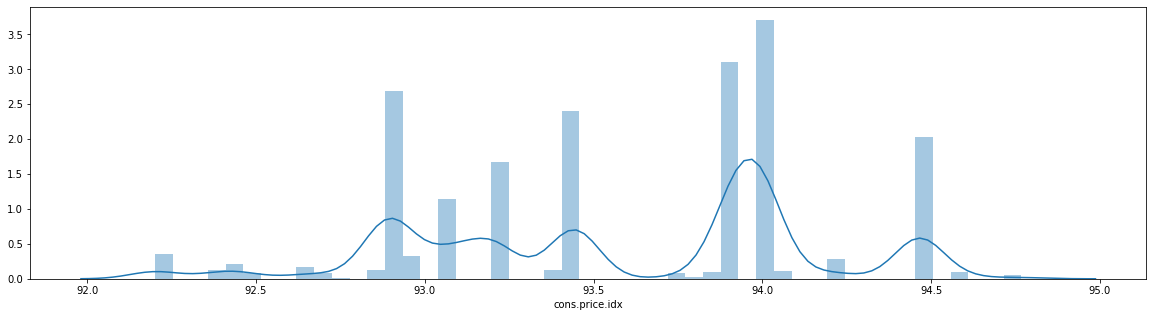

In [51]:
plt.figure(figsize = (20,5))
sns.distplot(bank['cons.price.idx'])

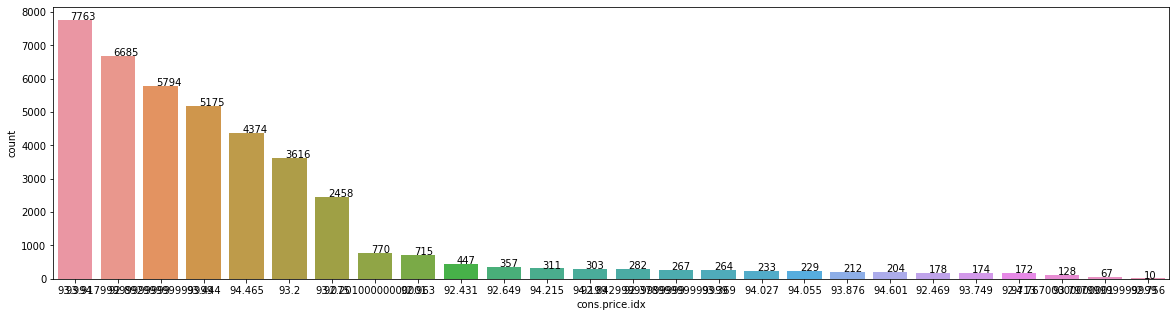

In [52]:
plt.figure(figsize = (20,5))
ax = sns.countplot(bank['cons.price.idx'], order =
               bank['cons.price.idx'].value_counts().index)

for p, label in zip(ax.patches, bank['cons.price.idx'].value_counts()):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+3))

In [53]:
bank['cons.price.idx'].nunique()

26

Okay now it looks quite suspicious -- the frequencies of the bars are the same as cons.conf.idx, and the unique value is also 26. I think 26 is the number of months during the campaign (Like what we saw above, there are 3 Mays, etc). Probably this is why these 2 features (cons.conf.idx and cons.price.idx) are correlated with each other. Let's try putting them together.

In [54]:
price = pd.DataFrame(bank['cons.price.idx'].value_counts())
conf = pd.DataFrame(bank['cons.conf.idx'].value_counts())

In [55]:
price.reset_index(inplace = True)
conf.reset_index(inplace = True)

In [56]:
pd.concat([price, conf], axis = 1)

,index,cons.price.idx,index,cons.conf.idx
0,93.994,7763,-36.4,7763
1,93.918,6685,-42.7,6685
2,92.893,5794,-46.2,5794
3,93.444,5175,-36.1,5175
4,94.465,4374,-41.8,4374
5,93.200,3616,-42.0,3616
6,93.075,2458,-47.1,2458
7,92.201,770,-31.4,770
8,92.963,715,-40.8,715
9,92.431,447,-26.9,447


Now it is clear that indeed the number/frequencies are the same. We can observe the numbers here are arbitrary for both features, but it is obvious that certain values in cons.conf.idx and certain values in cons.price.idx are paired (no duplicate values). All value of CPI in this dataset is above 92 and ranging to almost 95.

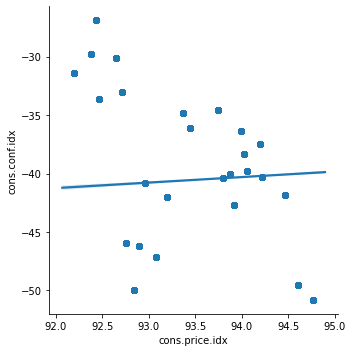

In [5]:
sns.lmplot('cons.price.idx', 'cons.conf.idx', data = bank)

In [57]:
bank['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [58]:
#Let's see if we can divide them into 2 groups based on the median
bank[bank['cons.price.idx'] < 93.75]['y'].value_counts()

no     17742
yes     2937
Name: y, dtype: int64

In [59]:
#Let's see if we can divide them into 2 groups based on the median
bank[bank['cons.price.idx'] >= 93.75]['y'].value_counts()

no     18806
yes     1703
Name: y, dtype: int64

Although in the distribution plot we can see as well that the curve is multimodal, but this one is quite difficult to make a cut-off (since the distribution is quite widespread, but not normal). But we can consider to divide them into 2 groups based on the median.

### euribor3m (Euribor 3 Month Rate) --  Daily Indicator
* Euribor is short for Euro Interbank Offered Rate. 
* The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another that mature after 3 months.

In [60]:
bank['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

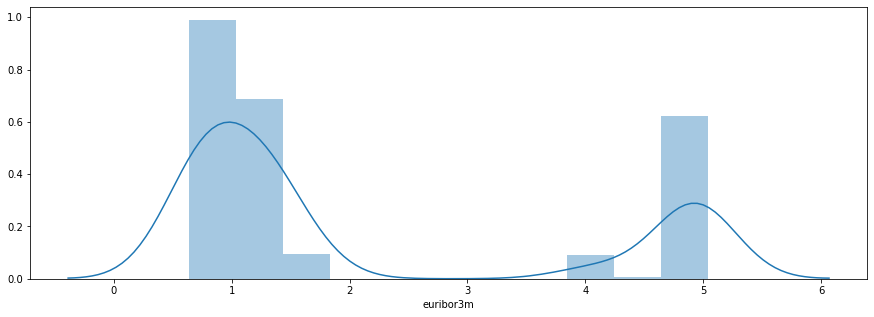

In [61]:
plt.figure(figsize = (15,5))
sns.distplot(bank[bank['y'] == 'yes']['euribor3m'])

Only in target Yes, there are more people agreed when the euribor3m value is less than 3. 

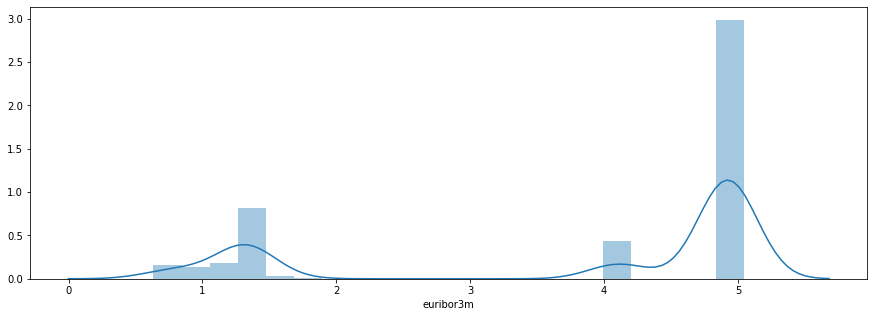

In [62]:
plt.figure(figsize = (15,5))
sns.distplot(bank[bank['y'] == 'no']['euribor3m'])

I only compared people in Target No, more people in Target No when euribor3m value is more than 3.

>  It seems that when the rate is lower, more people are likely to be in Target Yes

In [63]:
bank[(bank['euribor3m'] < 4)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27676,38,technician,married,professional.course,no,yes,yes,telephone,nov,wed,49,1,999,0,nonexistent,-0.1,93.200,-42.0,3.901,5195.8,no
27677,32,unemployed,single,high.school,no,no,yes,telephone,nov,thu,114,1,999,0,nonexistent,-0.1,93.200,-42.0,3.879,5195.8,no
27678,46,entrepreneur,single,professional.course,no,yes,no,telephone,nov,thu,8,1,999,0,nonexistent,-0.1,93.200,-42.0,3.879,5195.8,no
27679,27,admin.,single,high.school,no,yes,no,telephone,nov,fri,24,1,999,0,nonexistent,-0.1,93.200,-42.0,3.853,5195.8,no
27680,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,36,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [64]:
bank[(bank['euribor3m'] >= 4)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27671,37,admin.,married,unknown,no,no,no,cellular,nov,fri,34,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27672,41,technician,married,university.degree,no,yes,yes,cellular,nov,fri,38,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27673,32,admin.,married,high.school,no,no,no,cellular,nov,fri,219,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27674,34,admin.,married,university.degree,no,no,no,telephone,nov,fri,205,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no


Seems like the data is more concentrated when euribor3m value is above 4. Let's see if we can divide the further

In [65]:
bank['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [66]:
#Let's see if we use the Q3 as the cut-off 
bank[(bank['euribor3m'] >= 4) & (bank['euribor3m'] < 4.96)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27671,37,admin.,married,unknown,no,no,no,cellular,nov,fri,34,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27672,41,technician,married,university.degree,no,yes,yes,cellular,nov,fri,38,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27673,32,admin.,married,high.school,no,no,no,cellular,nov,fri,219,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
27674,34,admin.,married,university.degree,no,no,no,telephone,nov,fri,205,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no


In [67]:
bank[(bank['euribor3m'] >= 4.96)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9081,35,admin.,married,university.degree,no,yes,no,telephone,jun,fri,463,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
9082,30,services,married,high.school,unknown,no,no,telephone,jun,fri,24,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
9083,30,services,married,high.school,unknown,unknown,unknown,telephone,jun,fri,127,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
9084,30,services,married,high.school,unknown,no,yes,telephone,jun,fri,105,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
9085,31,services,married,high.school,no,yes,no,telephone,jun,fri,130,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24020,35,blue-collar,married,basic.9y,no,yes,no,telephone,oct,tue,4,1,999,0,nonexistent,-0.1,93.798,-40.4,4.968,5195.8,no
24021,56,blue-collar,married,unknown,no,yes,no,telephone,oct,tue,54,1,999,0,nonexistent,-0.1,93.798,-40.4,4.968,5195.8,no
24022,27,student,single,high.school,no,no,no,telephone,oct,tue,187,1,999,0,nonexistent,-0.1,93.798,-40.4,4.968,5195.8,yes


Since it is a daily indicator, let's see the pair of days and the euribor3m values

In [68]:
pd.DataFrame(bank.groupby('day_of_week')['euribor3m'].value_counts())

euribor3m
day_of_week euribor3m           
fri         4.021            676
            4.959            658
            1.250            587
            1.405            510
            1.313            492
...                          ...
wed         0.749              2
            0.639              1
            0.933              1
            3.743              1
            3.901              1

[442 rows x 1 columns]

In [69]:
bank['euribor3m'].nunique()

316

### nr.employed (Number of employees) -- Quarterly indicator
* Unfortunately there is no detailed explanation about this feature -- about how the value was generated. 

In [70]:
bank['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [71]:
bank['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

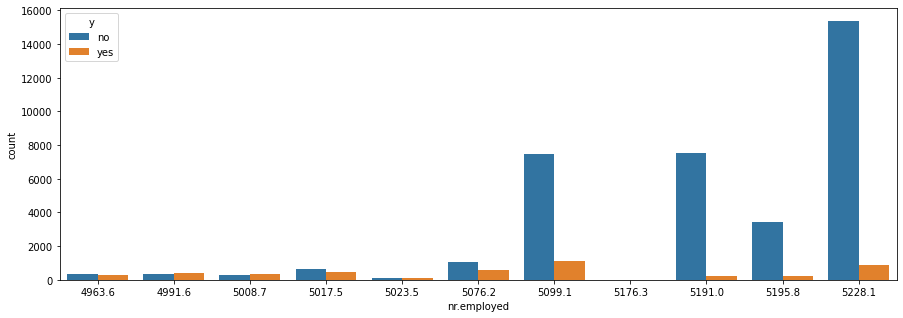

In [72]:
plt.figure(figsize = (15,5))
sns.countplot(bank['nr.employed'], hue = bank['y'])

There are a lot of contacts performed when the nr.employed value is 5228.1, and more Target No compared to Target Yes in this value. However in other values, particularly the smaller ones, the number of Target Yes and Target No are similar. 

Since we saw that euribor3m and nr.employed are highly correlated with each other, thus let's see when we plot them together using lmplot. Both features are in line with the behavior of increasing together.

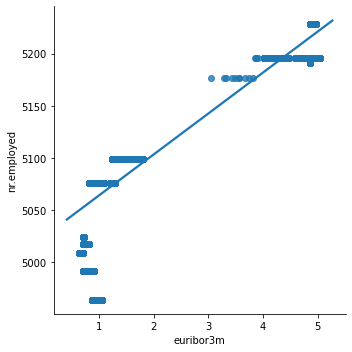

In [7]:
sns.lmplot('euribor3m', 'nr.employed', data = bank)

> ### Note
After exploring the data, I realized some numerical features can be binned (grouped further). However, since I am not the expert in this area, I will let the numerical data as it is, except for the one that are clearly in a categorical sense, such as pdays. The socio-economic features will be kept as original, except when the machine learning algorithm needs them to be binned. However, since they are strongly correlated with each other, I will also consider to drop some of them in the predictive analysis.

## Statistical analysis between Target classes (numerical features)

In this case, we will check whether our features given our target (Yes and No) are significantly different. Since there are only 2 classes, we will use independent t-test. However, in order to carry out the test confidently, several assumptions need to be fulfilled: independency, normal distribution, and equal variance. If the normal distribution assumption is not met, we will use non-parametric test (mannwhitneyu). If the normal distribution is met but equal variance is not met, we will use Welch t-test.

In [73]:
numcol

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [74]:
from scipy.stats import shapiro, bartlett, ttest_ind, mannwhitneyu

In [75]:
def stat_sig(col):
    yes = bank[bank['y'] == 'yes'][col]
    no = bank[bank['y'] == 'no'][col]
    
    # Normal Distribution check
    norm_yes = shapiro(yes)[1]
    norm_no = shapiro(no)[1]
    
    #If both are normal (shapiro p-value are >= 0.05)
    if (norm_yes >= 0.05) and (norm_no >= 0.05):
        
        # equal variance test
        eq_var = bartlett(yes,no)[1]
        if eq_var >= 0.05:
            stat_test = 'Independent T-Test'
            result = ttest_ind(yes, no, equal_var = True)[1]
        
        else:
            stat_test = 'Welch T-Test'
            result = ttest_ind(yes, no, equal_var = False)[1]
    # Not Normal distribution
    else:
        stat_test = 'Mann Whitney U Test'
        result = mannwhitneyu(yes, no)[1]
        
    #Printing the result
    print('{} {}'.format(col, stat_test))
    if result >= 0.05:
        print('Not significantly different')
    else:
        print('Significantly different')
    print(result)

In [76]:
print('The difference of Target Yes and Target No in numerical features: ')
print(' ')
for i in numcol:
    stat_sig(i)
    print(' ')

The difference of Target Yes and Target No in numerical features: 
 
age Mann Whitney U Test
Significantly different
0.00804026916375177
 
duration Mann Whitney U Test

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Significantly different
0.0
 
campaign Mann Whitney U Test
Significantly different
1.7092633159305857e-38
 
pdays Mann Whitney U Test
Significantly different
0.0
 
previous Mann Whitney U Test
Significantly different
0.0
 
emp.var.rate Mann Whitney U Test
Significantly different
0.0
 
cons.price.idx Mann Whitney U Test
Significantly different
4.786304433460403e-136
 
cons.conf.idx Mann Whitney U Test
Significantly different
2.950975583448307e-17
 
euribor3m Mann Whitney U Test
Significantly different
0.0
 
nr.employed Mann Whitney U Test
Significantly different
0.0
 


Turns out all numerical features, when we compared it statistically (non-parametric, most probably because of class imbalance/unequal size, thus the data is skewed) -- the feature between target Yes and target No differ significantly. Further, I decided to apply a central limit theorem, to see the estimation of mean distribution of the numerical features (using bootstrap method of 1000 repetitions).

In [77]:
## Central Limit theorem
# To see the difference of the estimation of mean distribution between two classes of Target

def mean_boot(col):
    yes = bank[bank['y'] == 'yes'][col]
    no = bank[bank['y'] == 'no'][col]
    yes_boot = []
    no_boot = []

    #Resampling 1000 times
    for i in range(1000):
        yes_boot.append(yes.sample(len(yes), replace = True).mean())
        no_boot.append(no.sample(len(no), replace = True).mean())
    
    ci = 0.95
    lower = 100*((1-ci)/2)
    upper = 100 - lower

    # 'lower_conf_int': np.percentile(boot, lower), 'upper_conf_int': np.percentile(boot,upper)}
    conf_int = {'yes_lower' : np.percentile(yes_boot, lower), 'yes_upper' : np.percentile(yes_boot, upper),
               'no_lower' : np.percentile(no_boot, lower), 'no_upper' : np.percentile(no_boot, upper),}
    
    #Plotting
    plt.figure(figsize = (15,5))
    plt.title(col)
    sns.distplot(yes_boot, label = 'Target Yes')
    plt.axvline(conf_int['yes_lower'], c = 'blue', ls = '--')
    plt.axvline(conf_int['yes_upper'], color = 'blue', linestyle = '--')
    
    sns.distplot(no_boot, label = 'Target No')
    plt.axvline(conf_int['no_lower'], c = 'red', ls = '--')
    plt.axvline(conf_int['no_upper'], color = 'red', linestyle = '--')
    plt.legend()


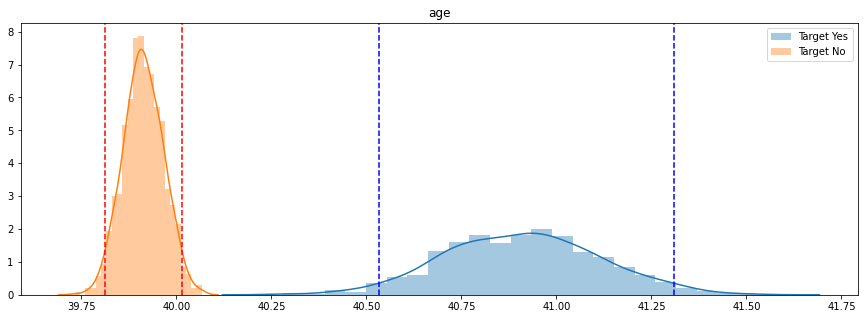

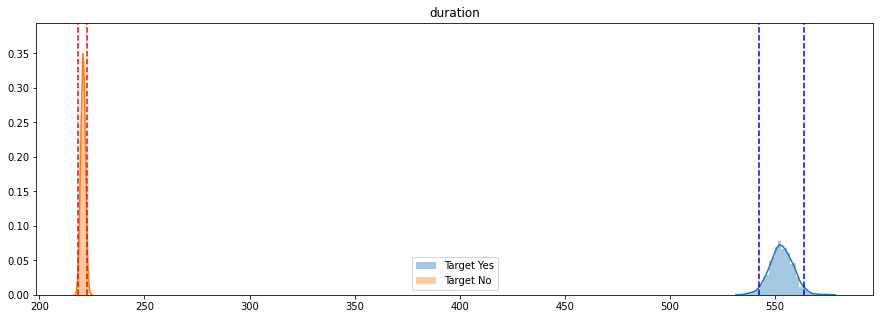

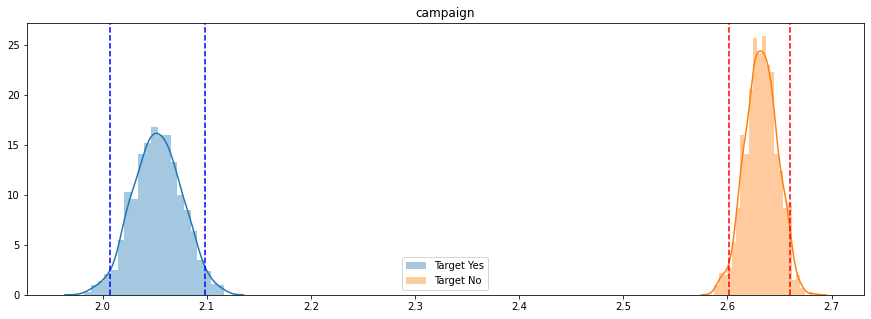

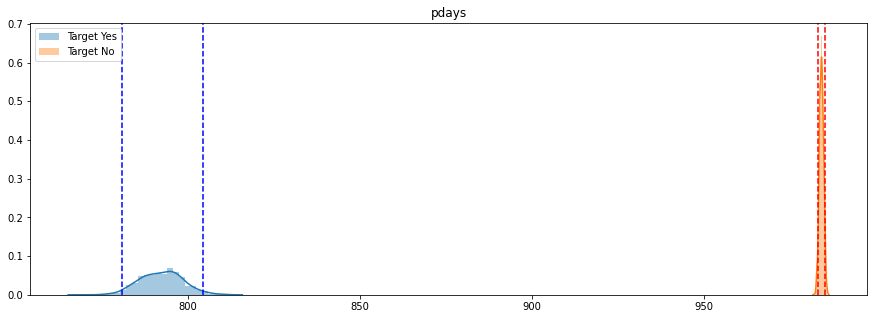

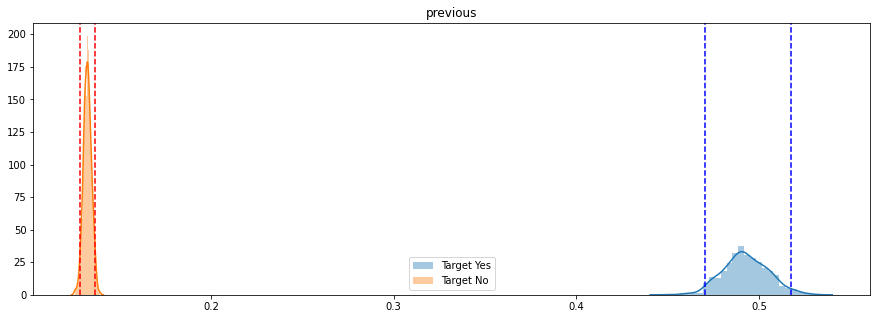

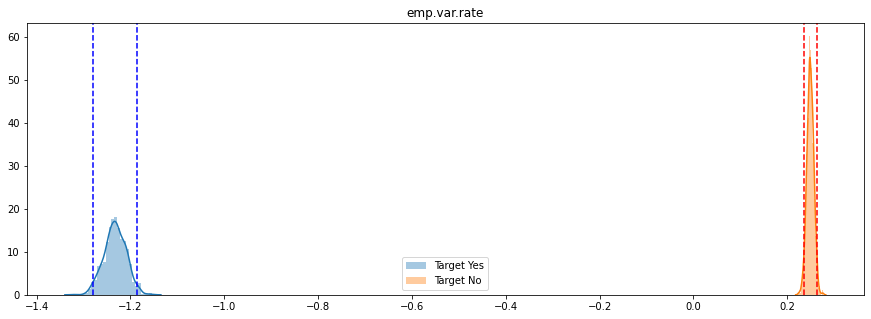

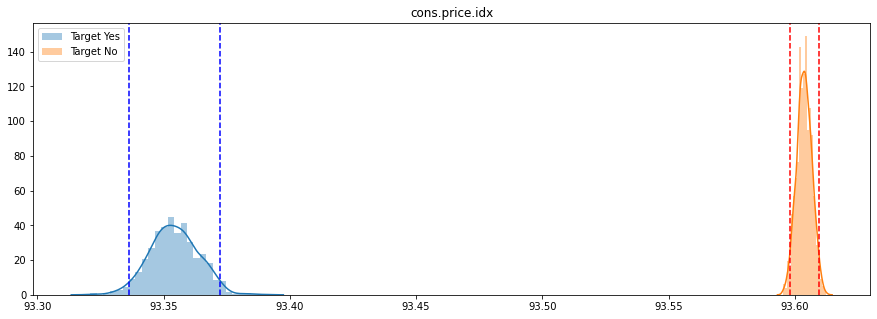

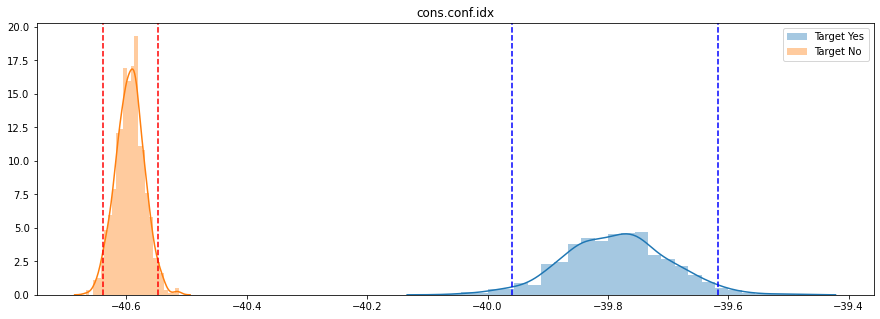

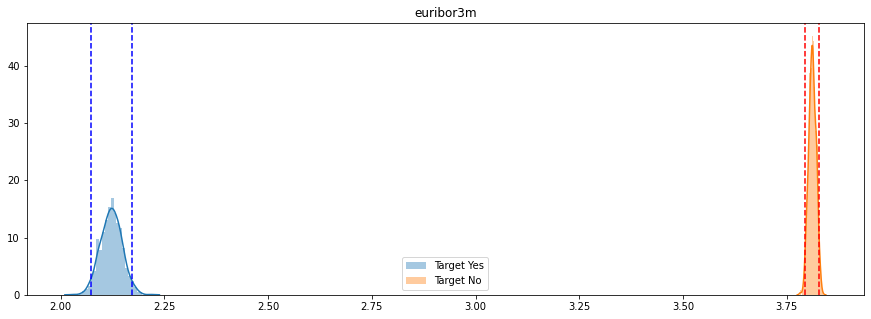

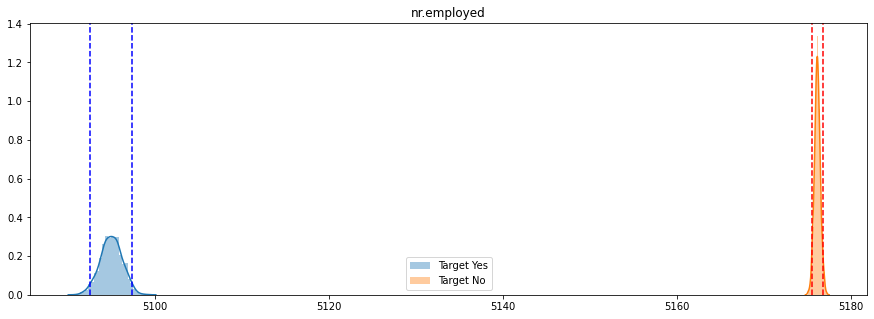

In [78]:
for i in numcol:
    mean_boot(i)

In these plots, we can see distinctions between Target Yes and Target No in our numerical features. Although some of the scales are considered narrow, but we can still see the differences, in average:
1. Age: Target Yes group are slightly older than Target No group
2. Duration: The call duration (in seconds) values are bigger for Target Yes group (more than 500 s, compared to less than 250 s in Target No)
3. Campaign: Target Yes have less number of contacts performed during this campaign
4. pdays: Target No has a pdays value of more than 950 days -- but we know from above that big value is caused by code 999
5. previous: Target Yes have a bigger value of previous contact performed
6. emp.var.rate: Target Yes have negative value of employment variation rate
7. cons.price.idx: Although the scale is really narrow (still within decimals of value 93), but Target Yes have a less consumer price index -- seems like when the index is in a bigger values, people are less likely to be in Target Yes.
8. cons.conf.idx: Although the scale is really narrow, but Target Yes have a bigger value compared to Target No -- seems like when confidence index are in a bigger value, consumers are more likely to put the money in the bank
9. euribor3m: Target Yes have smaller value -- when the rate is smaller, people are more likely to be in Target Yes
10. nr.employed: Target Yes have smaller value

# Categorical Features

In [79]:
catcol

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### Correlation among the categorical features

In [82]:
#Let's measure the correlation using cramer's V
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [83]:
corr_cat = []
for i in catcol:
    temp = []
    for j in catcol:
        temp.append(cramers_v(bank[i], bank[j]))
    corr_cat.append(temp)    

In [85]:
corr_cat_res = pd.DataFrame(corr_cat, index = catcol, columns = catcol)

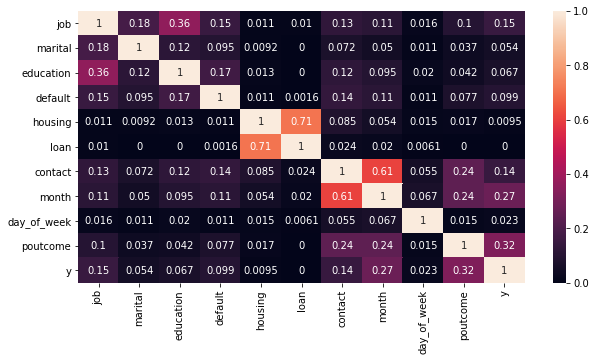

In [87]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_cat_res, annot = True)

> Some insights from heatmap above:
* Some of the features are correlated (albeit not really strongly) with the target, such as poutcome, contact, job, month. 
* Housing and Loan are correlated strongly with each other. 
* Contact and Month are also correlated strongly. Both of them are also having same correlation cramer's V valuer with poutcome (previous outcome). 
* Job is correlated with education, probably people with certain type of job have higher/lower education
* Marital is correlated with job and education, people with certain marital status have certain job and education
* Education is also correlated with default and contact type

We did the countplot already above, thus here we will see from different approach and only the ones which have correlation with other features

In [89]:
bank['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

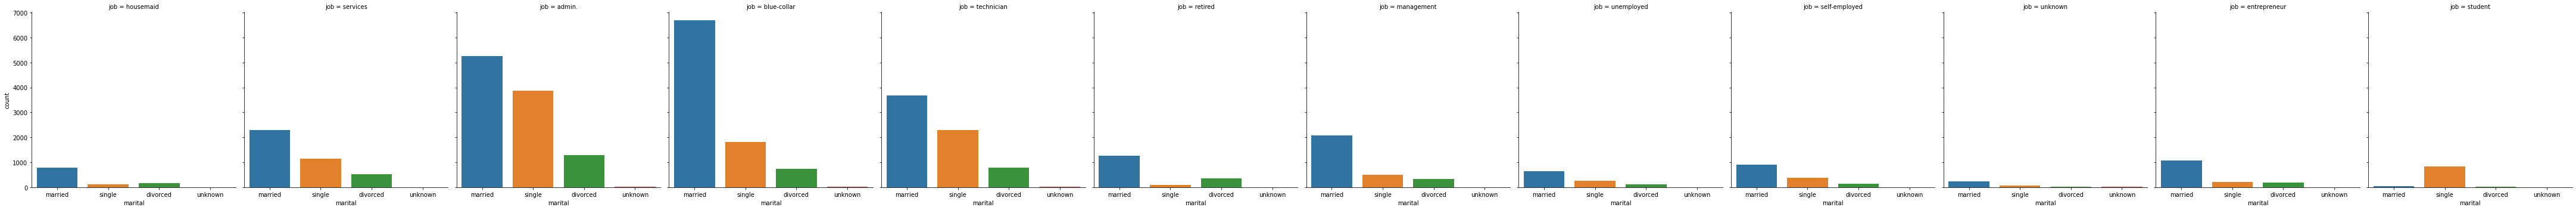

In [91]:
# Job and marital status
# Married people are the majority customers in the dataset, thus also mostly married people across job types.
# With an exception of student -- Most student are single (unmarried)
plt.figure(figsize=(20,20))
sns.catplot(data=bank,kind='count',x='marital',col='job')

> Married people are the majority customers in the dataset, thus mostly married people across job types.With an exception of student -- Most student are single (unmarried). I am considering to drop the marital status of 'unknown', since the observation number is really small.

<Figure size 1800x1440 with 0 Axes>

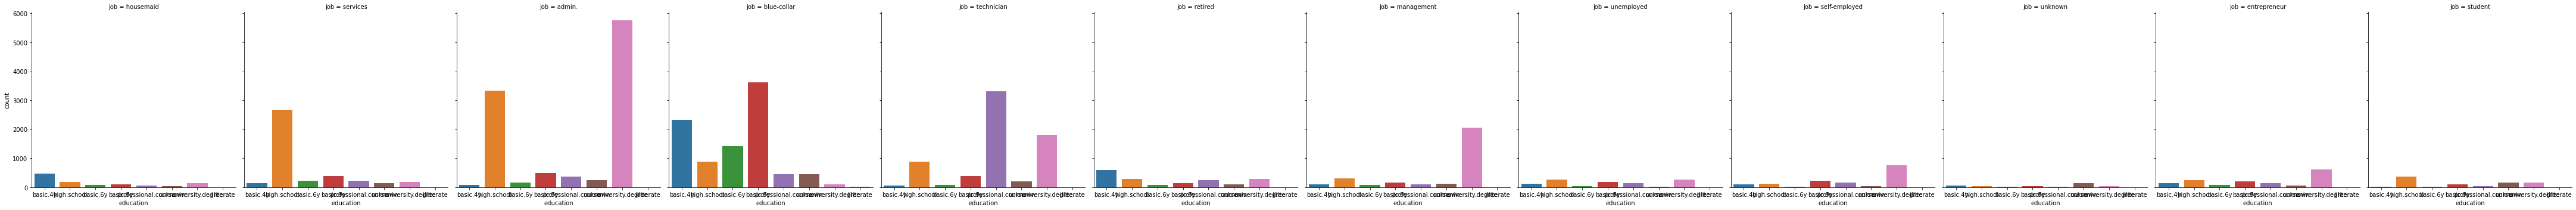

In [97]:
# Job and education status

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='education',col='job')

> In services job type, the majority customers' education is high school. While customers with university degree are more likely to be an entrepreneur, self-employed, work in a management position, and be an admin. Most blue-collar customers have basic.9y education, while technician mostly finished professional course or university degree.

> I was thinking of reducing the group here, but job type is quite distinct with each other. For education, since there are 3 basics (basic 4, 6, and 9), I am thinking to merge them into one group: basic education -- or other approach is to convert them based on their ordinality, although it is uncertain how to decide where to put 'unknown'

<Figure size 1800x1440 with 0 Axes>

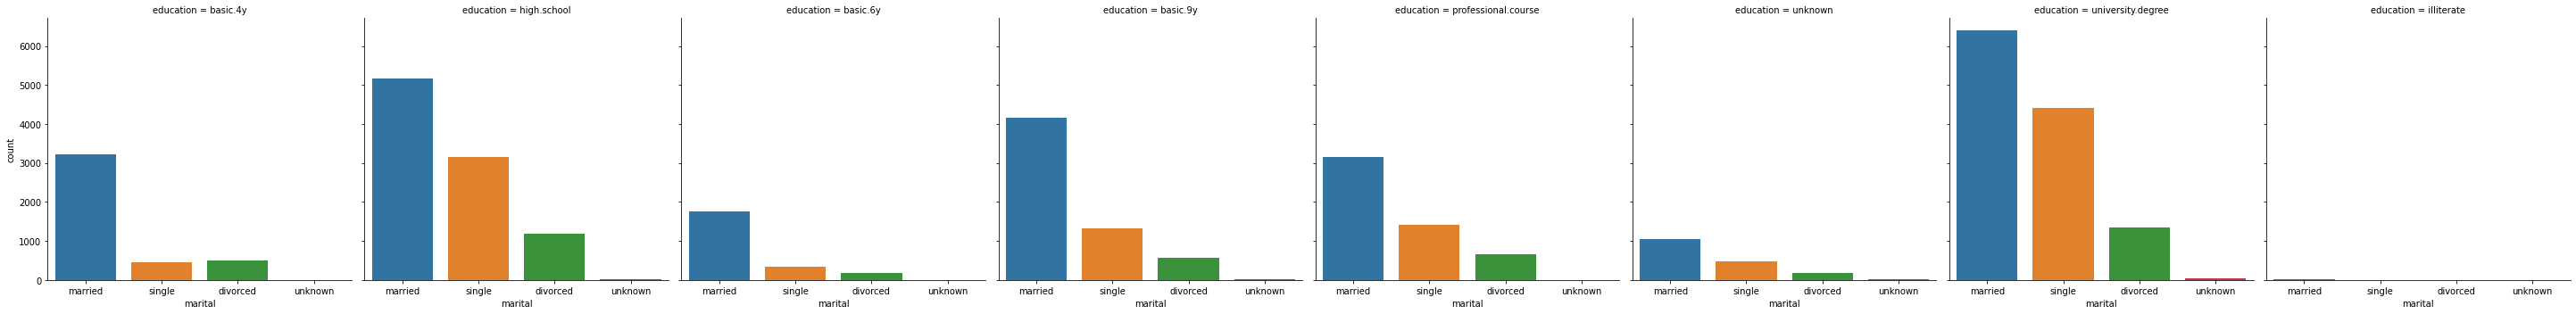

In [98]:
# Marital and education status

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='marital',col='education')

<Figure size 1800x1440 with 0 Axes>

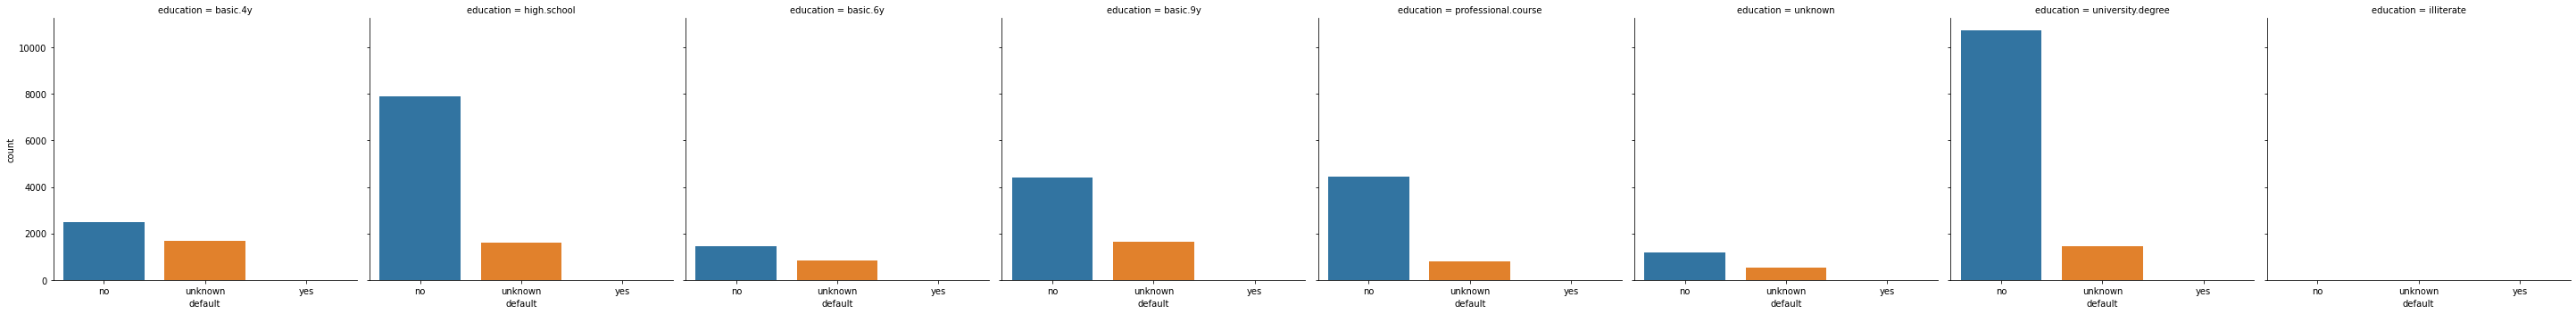

In [99]:
# Education status and default

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='default',col='education')

> Most of the respondents did not have default, however there is also unknown default across education. I am also considering to drop 'yes' default type, since the observation number is really small.

In [100]:
bank[bank['education'] == 'illiterate']['default'].value_counts()

no         11
unknown     7
Name: default, dtype: int64

In [101]:
bank[bank['education'] == 'illiterate']['y'].value_counts()

no     14
yes     4
Name: y, dtype: int64

I am considering to drop 'illiterate' group, since it is only 18 data -- and only 4 which are Target Yes.

<Figure size 1800x1440 with 0 Axes>

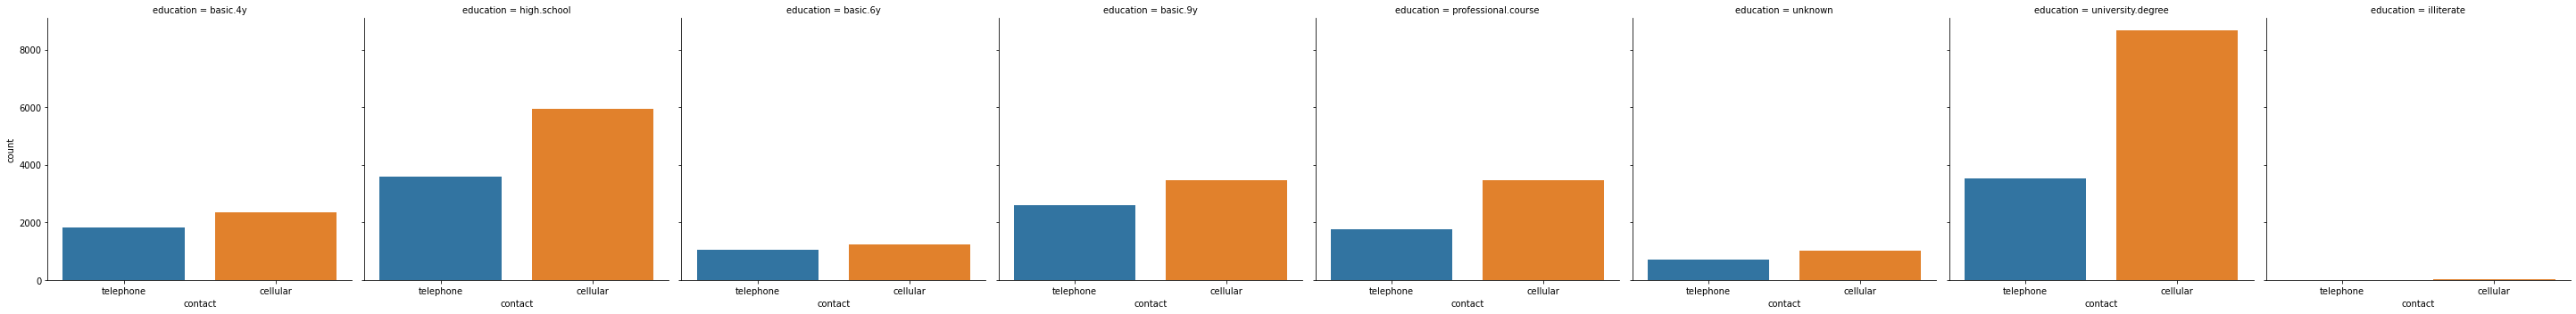

In [102]:
# Education status and contact type

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='contact',col='education')

<Figure size 1800x1440 with 0 Axes>

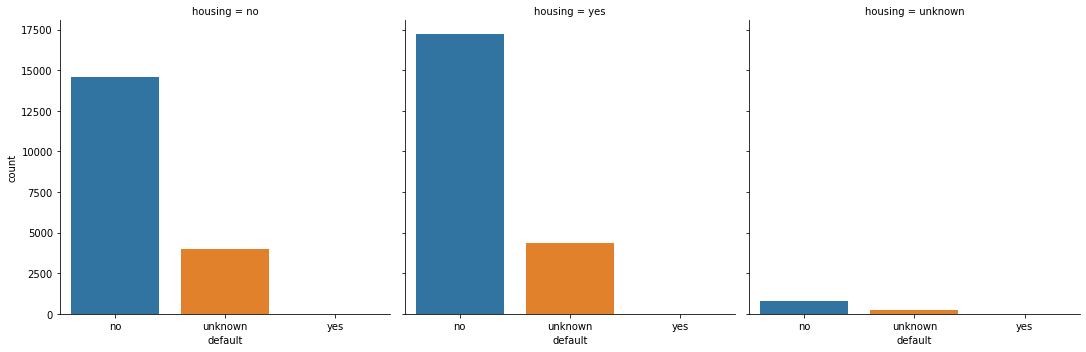

In [103]:
# Education status and default

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='default',col='housing')

Since housing and loan features are both about 'loan', and both of them has unknown value, lets see whether people who have unknown housing loan also have unknown loan

In [55]:
bank[bank['housing'] == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,362,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,212,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,119,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,437,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,152,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,192,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,212,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,256,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,83,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [56]:
bank[bank['loan'] == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,362,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,212,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,119,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,437,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,152,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,192,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,212,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,256,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,83,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [57]:
#each feature with unknown type has 990 data, now let's see when we combine them together

bank[(bank['housing'] == 'unknown') & (bank['loan'] == 'unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,362,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,212,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,119,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,437,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,152,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,192,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,212,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,256,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,83,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


> This means people with unknown type of housing also have unknown type of loan -- maybe they were not asked about loan questions. This is a great insight to further process our data later, since we can drop one column of them.

<Figure size 1800x1440 with 0 Axes>

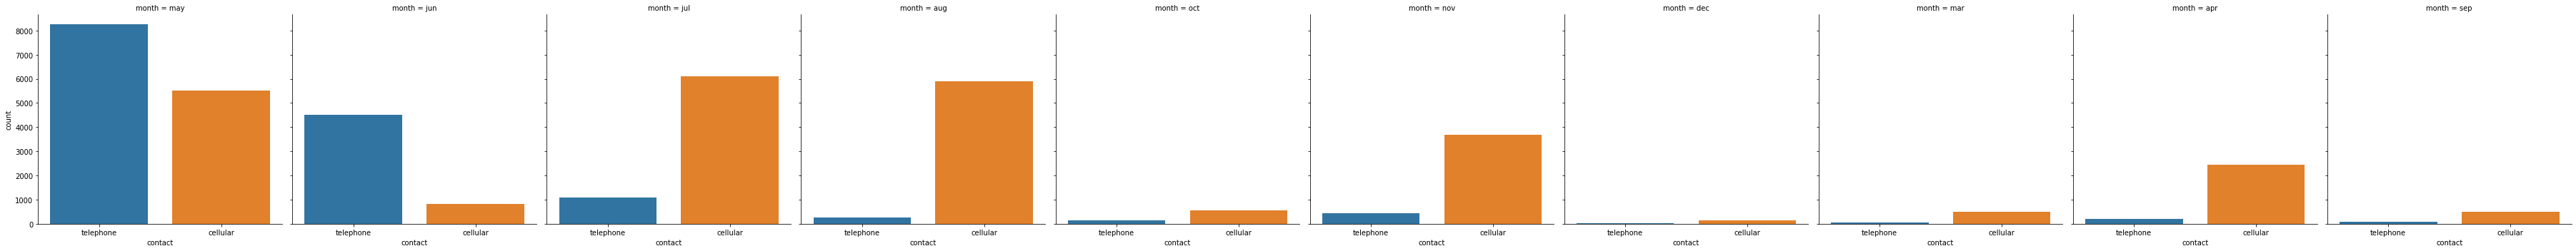

In [104]:
# Month and contact

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='contact',col='month')

> Most of the months, cellular contact type is the one performed. Only in May and June that telephone is the most contact type performed -- is this the reason people turned down the offer mostly in June and May?

In [8]:
## There are about 13000 of Target No in May -- around 8000 of them are contacted by telephone
bank[(bank['month'] == 'may') & (bank['contact'] == 'telephone') & (bank['y'] == 'no')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39759,23,unemployed,married,high.school,no,no,no,telephone,may,fri,35,1,999,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7,no
39765,26,unemployed,married,basic.4y,no,no,no,telephone,may,fri,29,1,999,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7,no
39771,31,unknown,single,high.school,no,yes,yes,telephone,may,mon,664,1,2,1,success,-1.8,93.876,-40.0,0.701,5008.7,no
39778,49,technician,single,university.degree,no,no,no,telephone,may,mon,8,1,999,0,nonexistent,-1.8,93.876,-40.0,0.701,5008.7,no


<Figure size 1800x1440 with 0 Axes>

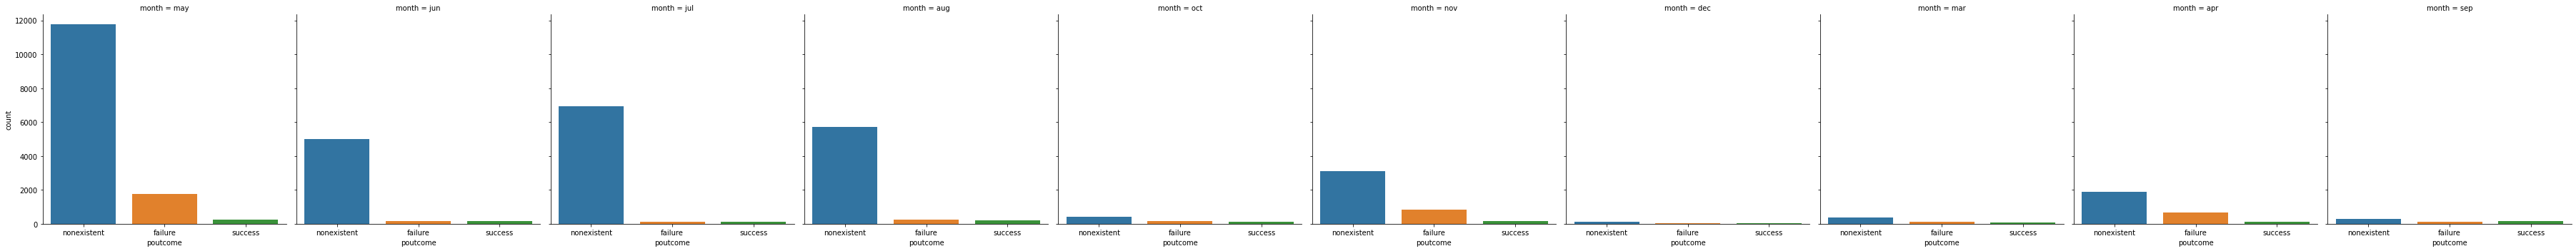

In [105]:
# Month and poutcome

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='poutcome',col='month')

> Most of the months, the previous outcome is nonexistent -- that means customers contacted is not contacted in the previous campaign (poutcome is the outcome from previous campaign). This is in line with 'previous' column -- since there are 86% customers not contacted in the previous campaign, thus the outcome is nonexistent.

<Figure size 1800x1440 with 0 Axes>

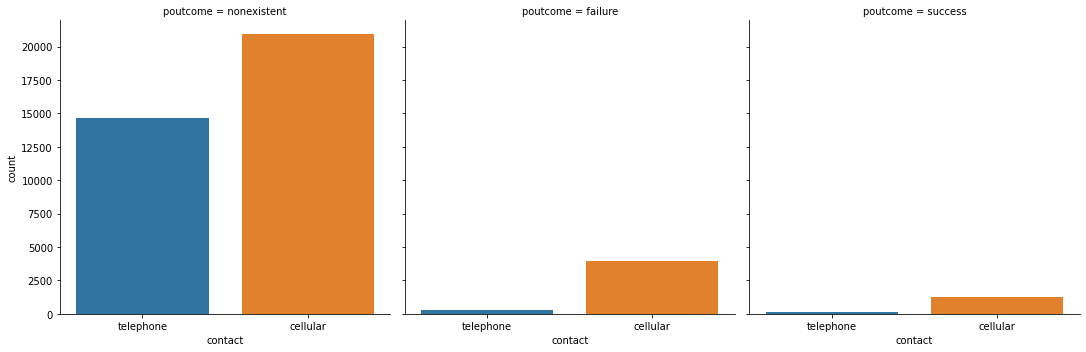

In [106]:
# Contact and poutcome

plt.figure(figsize=(25,20))
sns.catplot(data=bank,kind='count',x='contact',col='poutcome')

> I am particularly interested in observing the month and days of performed contact in current campaign. Is it really differ with each other? 
* Earlier we saw that May was the month which most contacts were performed -- this can influence the number of Target Yes, but is it really because of the month, or is it just because of the big number of contacts being performed? 
* Additionally, we saw earlier that the plot of contacts performed during the day of week are similar. Let's see if they are really similar. 
* I am planning to see the percentage of customers acquired during months and the day of week.

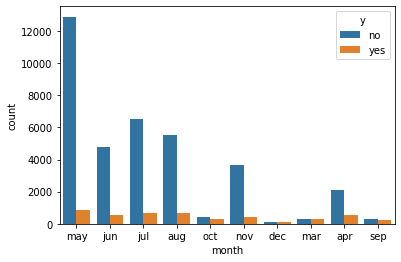

In [10]:
#Let's see once again the countplot of months
sns.countplot(bank['month'], hue = bank['y'])

In [16]:
len(bank[bank['month'] == 'may'])

13769

In [22]:
len(bank[(bank['y'] == 'yes') & (bank['month'] == 'may')])/len(bank[bank['month'] == 'may'])

0.06434744716391895

In [18]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [10]:
list_month = []

for i in bank['month'].unique():
    list_month.append([i, 
                       len(bank[bank['month'] == i]),
                       len(bank[(bank['y'] == 'no') & (bank['month'] == i)]),
                        len(bank[(bank['y'] == 'yes') & (bank['month'] == i)]),
                       round((len(bank[(bank['y'] == 'yes') & (bank['month'] == i)])/ len(bank[bank['month'] == i]))*100,2)])
                      
dfmonth = pd.DataFrame(columns = ['month', 'total', 'Target No', 'Target Yes','% Target Yes'], data = list_month)
dfmonth.sort_values('% Target Yes', ascending = False)

,month,total,Target No,Target Yes,% Target Yes
7,mar,546,270,276,50.55
6,dec,182,93,89,48.90
9,sep,570,314,256,44.91
4,oct,718,403,315,43.87
8,apr,2632,2093,539,20.48
3,aug,6178,5523,655,10.60
1,jun,5318,4759,559,10.51
5,nov,4101,3685,416,10.14
2,jul,7174,6525,649,9.05
0,may,13769,12883,886,6.43


Text(0, 0.5, '%')

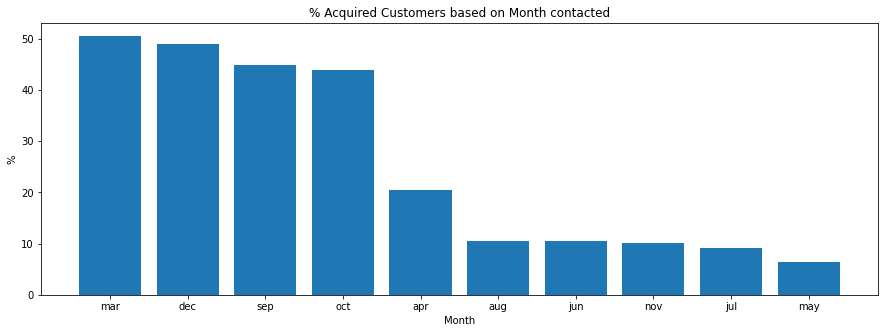

In [12]:
dfmonth_sort = dfmonth.sort_values('% Target Yes', ascending = False)
plt.figure(figsize = (15, 5))
plt.bar(dfmonth_sort['month'], dfmonth_sort['% Target Yes'])
plt.title('% Acquired Customers based on Month contacted')
plt.xlabel('Month')
plt.ylabel('%')

> Here we can see that actually May is the month with least %Target Yes -- a lot of prospective customers were contacted but only 6% that finally agreed to the offer. It can be seen that actually March, December, September and October are the months with more acquired customers, with 50% customers agreed to the offer in March. In December we can also see quite high percentage of acquired customers, although it is considered as a holiday season. Both September and October also have higher percentage of Target Yes compared to other months. Probably this can provide an insight for bank, to contact and target more people in those months, particularly March.

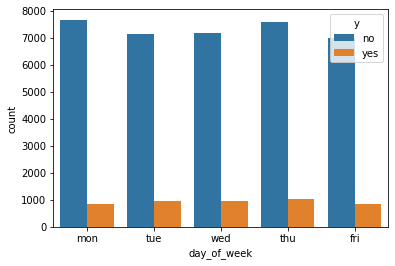

In [51]:
#Let's see once again the countplot of days
sns.countplot(bank['day_of_week'], hue = bank['y'])

In [13]:
list_day = []

for i in bank['day_of_week'].unique():
    list_day.append([i, 
                       len(bank[bank['day_of_week'] == i]),
                       len(bank[(bank['y'] == 'no') & (bank['day_of_week'] == i)]),
                        len(bank[(bank['y'] == 'yes') & (bank['day_of_week'] == i)]),
                       round((len(bank[(bank['y'] == 'yes') & (bank['day_of_week'] == i)])/ len(bank[bank['day_of_week'] == i]))*100,2)])
                      
dfday = pd.DataFrame(columns = ['Day of week', 'total', 'Target No', 'Target Yes','% Target Yes'], data = list_day)
dfday.sort_values('% Target Yes', ascending = False)

,Day of week,total,Target No,Target Yes,% Target Yes
3,thu,8623,7578,1045,12.12
1,tue,8090,7137,953,11.78
2,wed,8134,7185,949,11.67
4,fri,7827,6981,846,10.81
0,mon,8514,7667,847,9.95


Text(0, 0.5, '%')

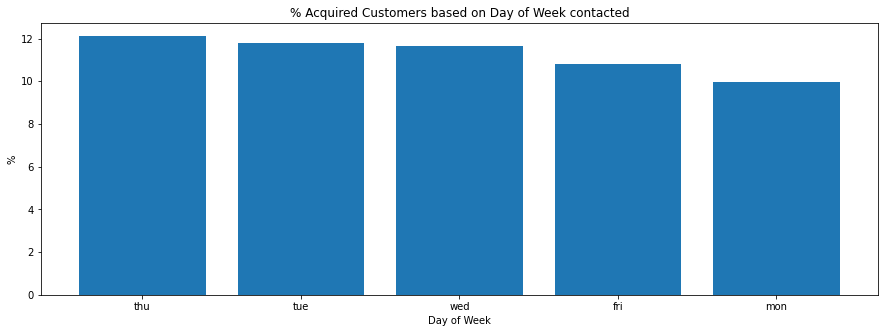

In [14]:
dfday_sort = dfday.sort_values('% Target Yes', ascending = False)

plt.figure(figsize = (15, 5))
plt.bar(dfday_sort['Day of week'], dfday_sort['% Target Yes'])
plt.title('% Acquired Customers based on Day of Week contacted')
plt.xlabel('Day of Week')
plt.ylabel('%')

> Unlike when we observe month, here we see not much difference in the percentage of customers acquired in across the day of the week -- approximately 10% each day. We can see that the most customers acquired are called on Thursday, while the least is on Monday. Total people being called each day also do not vary a lot -- only Friday that less people were called, can be caused of the close proximity to the weekend.

> Let's see as well the percentage of acquired customers based on their job and their education

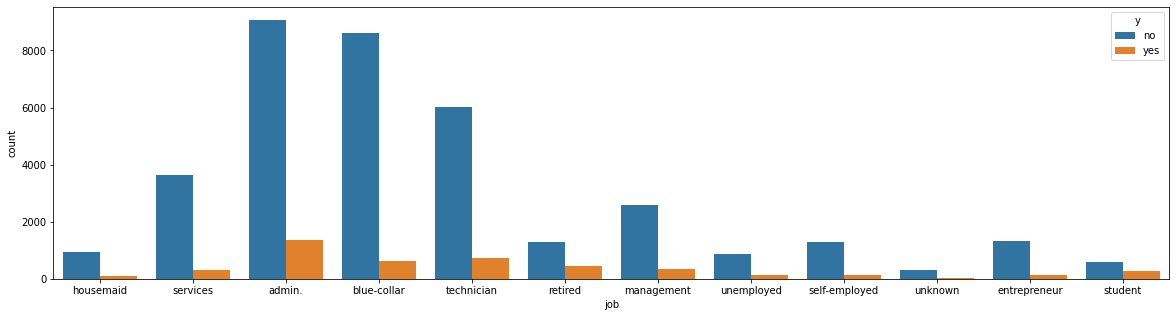

In [4]:
plt.figure(figsize = (20, 5))
sns.countplot(bank['job'], hue = bank['y'])

In [5]:
list_job = []

for i in bank['job'].unique():
    list_job.append([i, 
                       len(bank[bank['job'] == i]),
                       len(bank[(bank['y'] == 'no') & (bank['job'] == i)]),
                        len(bank[(bank['y'] == 'yes') & (bank['job'] == i)]),
                       round((len(bank[(bank['y'] == 'yes') & (bank['job'] == i)])/ len(bank[bank['job'] == i]))*100,2)])
                      
dfjob = pd.DataFrame(columns = ['Job', 'total', 'Target No', 'Target Yes','% Target Yes'], data = list_job)
dfjob_sort = dfjob.sort_values('% Target Yes', ascending = False)

In [6]:
dfjob_sort

,Job,total,Target No,Target Yes,% Target Yes
11,student,875,600,275,31.43
5,retired,1720,1286,434,25.23
7,unemployed,1014,870,144,14.20
2,admin.,10422,9070,1352,12.97
6,management,2924,2596,328,11.22
9,unknown,330,293,37,11.21
4,technician,6743,6013,730,10.83
8,self-employed,1421,1272,149,10.49
0,housemaid,1060,954,106,10.00
10,entrepreneur,1456,1332,124,8.52


Text(0, 0.5, '%')

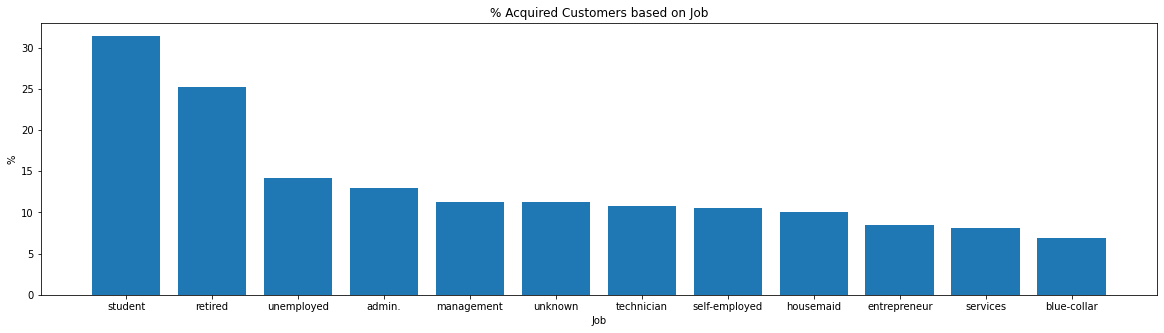

In [9]:
plt.figure(figsize = (20, 5))
plt.bar(dfjob_sort['Job'], dfjob_sort['% Target Yes'])
plt.title('% Acquired Customers based on Job')
plt.xlabel('Job')
plt.ylabel('%')

> Surprisingly, customers who are students or retired are more likely to be in the Target Yes. The bottom three are entrepreneur, services and blue-collar job types that are least likely to put the deposit into the bank.

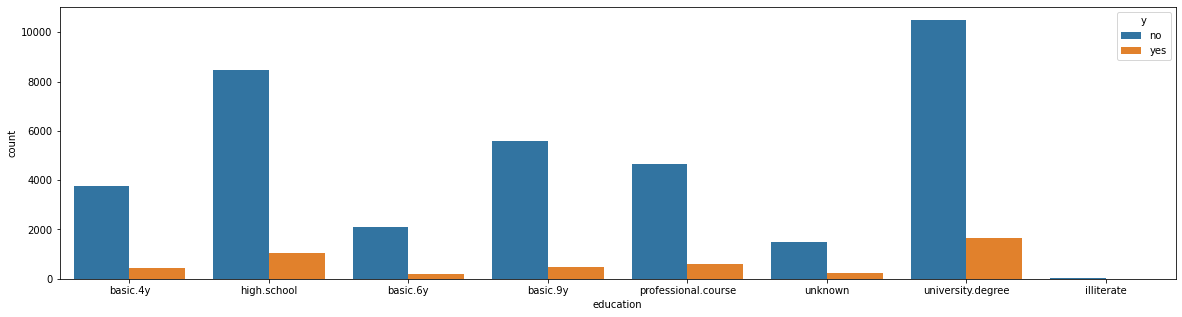

In [15]:
plt.figure(figsize = (20, 5))
sns.countplot(bank['education'], hue = bank['y'])

In [18]:
list_ed = []

for i in bank['education'].unique():
    list_ed.append([i, 
                       len(bank[bank['education'] == i]),
                       len(bank[(bank['y'] == 'no') & (bank['education'] == i)]),
                        len(bank[(bank['y'] == 'yes') & (bank['education'] == i)]),
                       round((len(bank[(bank['y'] == 'yes') & (bank['education'] == i)])/ len(bank[bank['education'] == i]))*100,2)])
                      
dfed = pd.DataFrame(columns = ['Education', 'total', 'Target No', 'Target Yes','% Target Yes'], data = list_ed)
dfed_sort = dfed.sort_values('% Target Yes', ascending = False)

In [19]:
dfed_sort

,Education,total,Target No,Target Yes,% Target Yes
7,illiterate,18,14,4,22.22
5,unknown,1731,1480,251,14.50
6,university.degree,12168,10498,1670,13.72
4,professional.course,5243,4648,595,11.35
1,high.school,9515,8484,1031,10.84
0,basic.4y,4176,3748,428,10.25
2,basic.6y,2292,2104,188,8.20
3,basic.9y,6045,5572,473,7.82


Text(0, 0.5, '%')

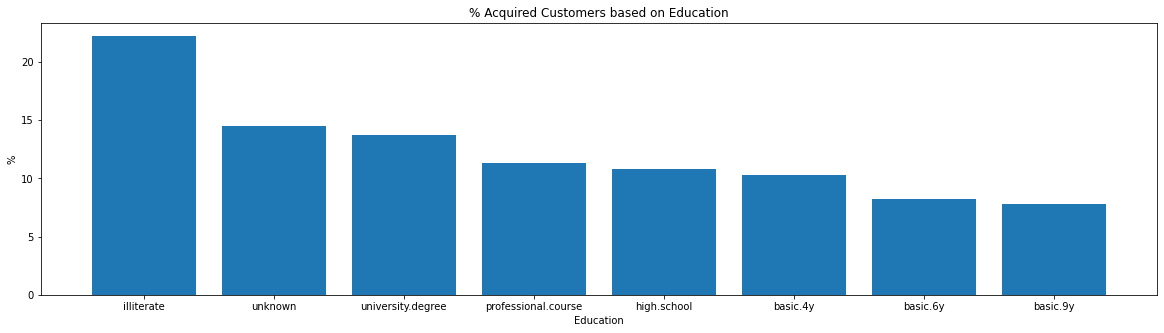

In [20]:
plt.figure(figsize = (20, 5))
plt.bar(dfed_sort['Education'], dfed_sort['% Target Yes'])
plt.title('% Acquired Customers based on Education')
plt.xlabel('Education')
plt.ylabel('%')

> Unfortunately the top 2 education types are illiterate and unknown. Customers with illiterate type is quite small in the terms of number, thus we can not confidently say that this is the best target. For now, the best target based on the education type is people with university degree. The bottom three are people with basic educations -- this can be a sign to group them together.

# Correlation between Categorical features and Numerical features

In [107]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [109]:
corr_num_cat = []
for i in numcol:
    temp = []
    for j in catcol:
        temp.append(correlation_ratio(bank[j], bank[i]))
    corr_num_cat.append(temp)    

In [110]:
corr_numcat_res = pd.DataFrame(corr_num_cat, index = numcol, columns = catcol)

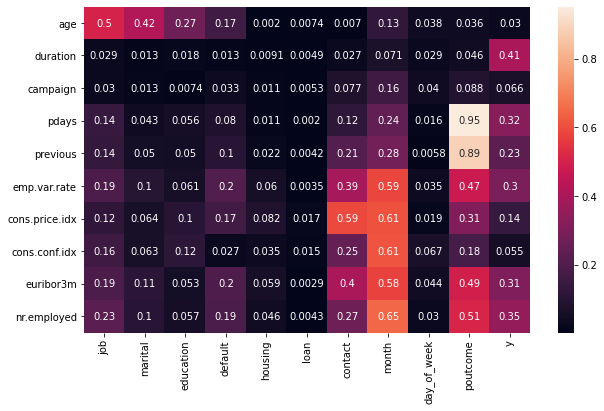

In [117]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_numcat_res, annot = True)

> Based on heatmap above, we can observe:

* Age is correlated with job, marital and education (in a descending order). People with an older age probably have certain job type compared to younger people (which is most likely students)

* Duration as mentioned in the beginning of this notebook is correlated with the target y

* pdays, previous, and poutcome are all highly correlated with each other -- because they are all the data from previous campaign.

* The socio-economic features are correlated with month, because the former features are indicators based on month or a quarter. This might be the reason they are correlated.

* contact and poutcome are both also correlated with the socio-economic features. However we can not infer it as a causation.

* Finally here we also see that many independent features are correlated with the target: duration is really high, and some socio-economic features, and previous-campaign related features.

# Conclusion

> Based on the findings, here are several remarks:

* There are a class imbalance in our target, with 88% of people contacted did not put the deposit from the bank offer (Target No).

* Some of the features are correlated with each other, most observed is the socio-economic features where they are indicators produced timely (some monthly and quarterly).

* Regarding the numerical columns: Using the statistical analysis and bootstrap method it can be observed that the estimation of means from the features between our target are different, although in some features, the distribution is quite narrow.

* Regarding the categorical columns: customers that agreed on the deposit (Target Yes) are mostly having admin job type, are married, are having university degree, have never been defaulted, have housing loan but not other loan, contacted via cellular.

* May is the month where most contact were performed, but the percentage of customer acquisition is surprisingly low. Instead March is the month with most customers putting their deposit.

* Students and retired people are more likely to agree to the bank offer in terms of making deposit.

* For now, the best target based on the education type is people with university degree.

* There are some features with information related to the previous campaign and before this current campaign, such as previous, pdays and poutcome, which are obviously correlated with each other. 

In [9]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
